In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import geopandas
import cartopy.io.shapereader as shpreader
import shapely

from matplotlib.patches import Rectangle, Patch
from global_land_mask import globe

import xarray as xr

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    'text.latex.preamble': r'\newcommand{\mathdefault}[1][]{}'
})



In [2]:
df = pd.read_csv('../data/2_merged_da_data.csv')
df.head()

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,precip_da_cat,temp_da_cat,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land
0,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,True
1,-88.75,-176.25,-88.75,-176.25,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,1.0,1685.654015,True
2,-88.75,-173.75,-88.75,-173.75,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,True
3,-88.75,-171.25,-88.75,-171.25,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,True
4,-88.75,-168.75,-88.75,-168.75,-87.5,-167.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,True


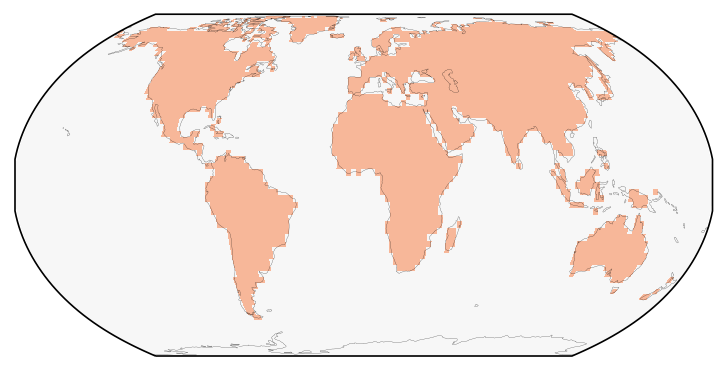

In [3]:
## Plot land

df['is_land'] = globe.is_land(df.LAT+1.25, df.LON+1.25)
df.loc[df['LAT']<-60,'is_land'] = False

fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

n = np.array(df.is_land).reshape(len(df.LAT.unique()),len(df.LON.unique()))
mesh = ax.pcolormesh(
    df.LON.unique(),
    df.LAT.unique(),
    n,
    cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
zm = np.ma.masked_less(n, 2)

ax.pcolor(
    df.LON.unique(),
    df.LAT.unique(),
    zm,
    hatch="//////",
    #hatch="......",
    transform=ccrs.PlateCarree(),
    alpha=0.
)

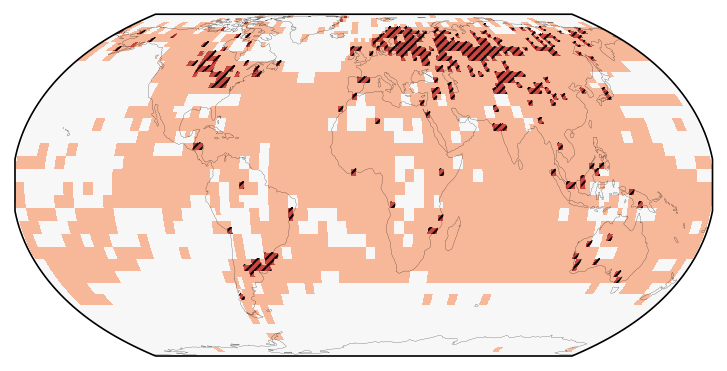

In [4]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)



n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
mesh = ax.pcolormesh(
    df.LON.unique(),
    df.LAT.unique(),
    n,
    cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
zm = np.ma.masked_less(n, 2)

ax.pcolor(
    df.LON.unique(),
    df.LAT.unique(),
    zm,
    hatch="//////",
    #hatch="......",
    transform=ccrs.PlateCarree(),
    alpha=0.
)

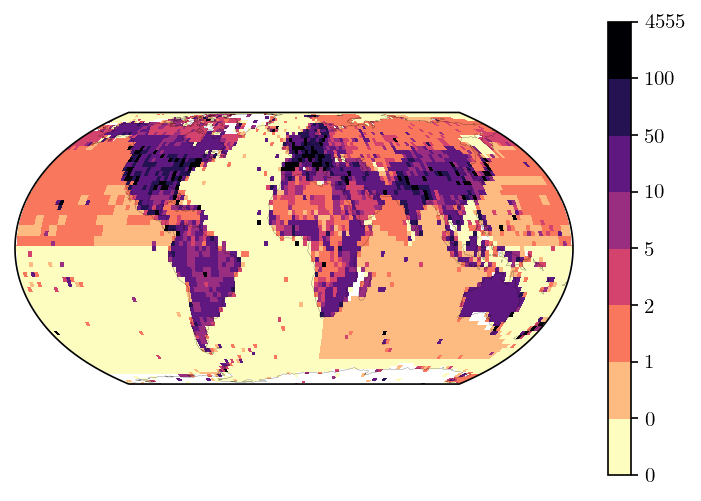

In [5]:

fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

n = np.array(df.total_study_prop).reshape(len(df.LAT.unique()),len(df.LON.unique()))
#vm = round(n.max()/10*10)
vm = n.max()
n[n==0] = np.nan

bounds = np.array([0,0.5,1,2.5,5,10,50,100,vm])


mesh = ax.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
   #norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
    norm = mpl.colors.BoundaryNorm(bounds,256),
    #cmap=plt.cm.get_cmap('YlOrBr',vm/3-1), 
    #cmap = "YlOrBr",
    cmap = "magma_r",
    transform=ccrs.PlateCarree(),
    #alpha=0.5
)
cbar = plt.colorbar(mesh)

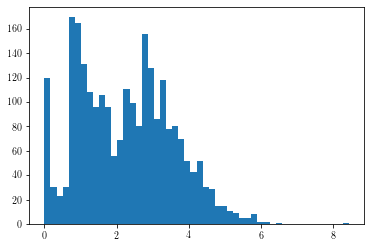

In [6]:
plt.hist(np.log(df[df['is_land']==True].total_study_prop+1),bins=50)
plt.show()

median 8.392597552929102
mean 23.44007181632882
q2 2.04748542648636


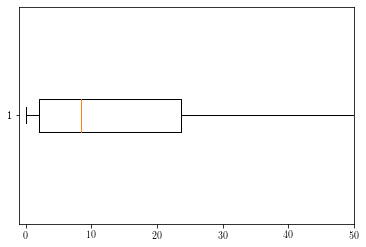

In [7]:
fig, ax = plt.subplots()
ax.boxplot(df[df['is_land']==True].total_study_prop, vert=False)
ax.set_xlim(xmax=50, xmin=-1)
print("median", df[df['is_land']==True].total_study_prop.median())
print("mean", df[df['is_land']==True].total_study_prop.mean())
print("q2", df[df['is_land']==True].total_study_prop.quantile(.25))

In [8]:
print(df[df['is_land']==True].total_study_prop.quantile(np.linspace(0,1,5)))


0.00       0.000000
0.25       2.047485
0.50       8.392598
0.75      23.719470
1.00    4554.832901
Name: total_study_prop, dtype: float64


In [9]:
print(df[df['is_land']==True].total_study_prop.quantile(np.linspace(0,1,11)))


0.0       0.000000
0.1       1.055416
0.2       1.553431
0.3       2.666365
0.4       4.637042
0.5       8.392598
0.6      13.840899
0.7      18.562025
0.8      28.658481
0.9      53.213400
1.0    4554.832901
Name: total_study_prop, dtype: float64


In [376]:
lots = 20
little = 5


#lots = 5
#little =1

def cat_evidence(df, lots, little):

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['total_study_prop']<little),"evidence_cat"
    ] = 1

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['total_study_prop']>=little),"evidence_cat"
    ] = 2

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['total_study_prop']>=lots),"evidence_cat"
    ] = 3

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['total_study_prop']<little),"evidence_cat"
    ] = 4

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['total_study_prop']>=little),"evidence_cat"
    ] = 5

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['total_study_prop']>=lots),"evidence_cat"
    ] = 6
    
    return df

df = cat_evidence(df, lots, little)

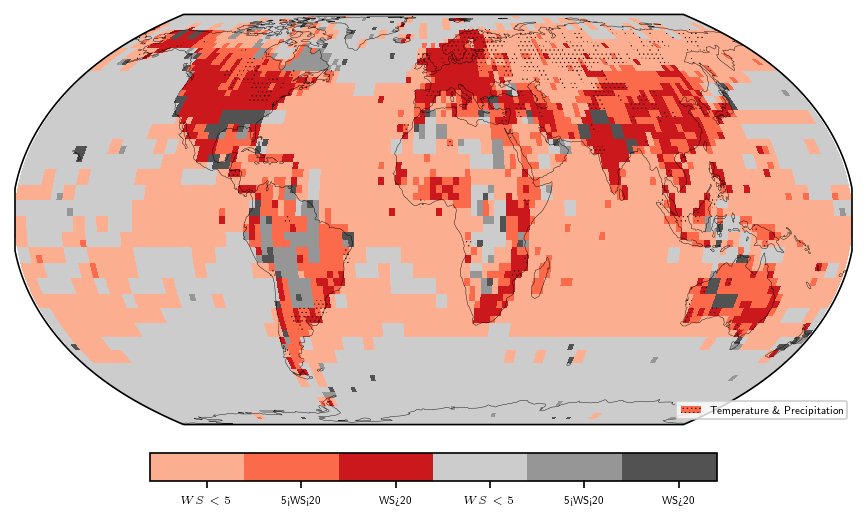

In [11]:
fig = plt.figure(figsize=(7.2, 5), dpi=150)

mpl.rcParams['hatch.linewidth'] = 0.2

ax = plt.subplot(projection=ccrs.EqualEarth())


n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))

ax.coastlines(lw=0.2)

pubugn = ['#ece2f0','#a6bddb','#1c9099']
pubugn = ['#f6eff7','#bdc9e1','#67a9cf','#02818a'][1:]
greens = ['#f7fcb9','#addd8e','#31a354']

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]

reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]

colors = reds + greys #pubugn

cmap = mpl.colors.ListedColormap(colors)

mesh = ax.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    cmap = cmap,
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh, orientation="horizontal", pad=0.05, fraction=0.05)
cbar.set_ticks(np.array(np.linspace(1,cmap.N,cmap.N+1)[:-1]+0.5))

n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))

zm = np.ma.masked_less(n, 2)

dots = ax.pcolor(
    df.LON.unique(),
    df.LAT.unique(),
    zm,
    #hatch="//////",
    hatch="......",
    transform=ccrs.PlateCarree(),
    alpha=0.
)

cbar.set_ticklabels([
    "D\&A trend\n 0 impacts",
    f"D\&A trend\n <{lots} impacts",
    f"D\&A trend\n >{lots} impacts",
    "no D\&A trend\n 0 impacts",
    f"no D\&A trend\n <{lots} impacts",
    f"no D\&A trend\n >{lots} impacts",
])

cbar.set_ticklabels([
    f"$WS<{little}$",
    f"{little}<WS<{lots}",
    f"WS>{lots}"
]*2)

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    hatch="......",
    label="Temperature \& Precipitation",
)

ax.add_patch(rect)
ax.legend(fontsize=5, loc="lower right")

cbar.ax.tick_params(labelsize=5)

In [175]:
cmap=plt.cm.get_cmap('RdBu_r',9)
cmap

In [176]:
cma

['N',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gamma',
 '_i_bad',
 '_i_over',
 '_i_under',
 '_init',
 '_isinit',
 '_resample',
 '_reverser',
 '_rgba_bad',
 '_rgba_over',
 '_rgba_under',
 '_segmentdata',
 '_set_extremes',
 'colorbar_extend',
 'from_list',
 'is_gray',
 'monochrome',
 'name',
 'reversed',
 'set_bad',
 'set_gamma',
 'set_over',
 'set_under']

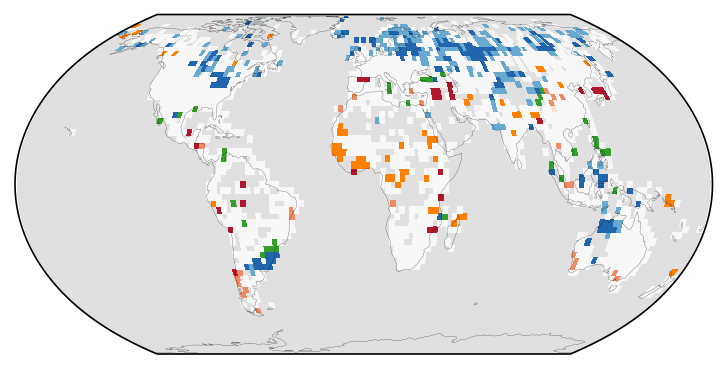

In [285]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

def plot_da(df, ax, da_var):
    
    colors = ['#ff7f00','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#33a02c"]
    if "precip" not in da_var:
        colors.reverse()
    
    ax.coastlines(lw=0.1)

    bn = np.zeros((len(df.LAT.unique()), len(df.LON.unique())))
    bn+=1
    mesh = ax.pcolormesh(
        df.LON.unique(),#-degrees*0.5,
        df.LAT.unique(),#-degrees*0.5,
        bn,
        cmap = mpl.colors.ListedColormap(["#e0e0e0"]),
        transform=ccrs.PlateCarree(),
    )
    
    n = np.array(df[da_var]).reshape(len(df.LAT.unique()),len(df.LON.unique()))
    mesh = ax.pcolormesh(
        df.LON.unique(),
        df.LAT.unique(),
        n,
        cmap=mpl.colors.ListedColormap(colors),
        vmin=-4, vmax=4,
        transform=ccrs.PlateCarree(),
    )
    
    return mesh
    
plot_da(df, ax, 'updated_precip')

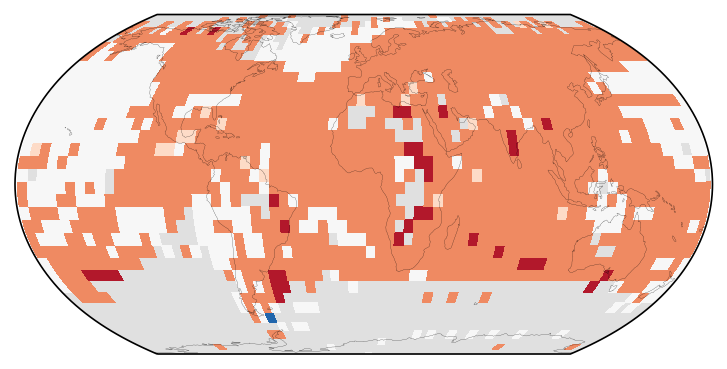

In [181]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())
plot_da(df, ax, 'updated_temp')


In [13]:
area_sums = df[df['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
area_sums['prop'] = area_sums['area']/area_sums['area'].sum()
area_sums

,evidence_cat,n_da_impacts,area,prop
0,1.0,1,3.262523e+07,0.236713
1,1.0,2,6.172859e+06,0.044787
2,2.0,1,3.300801e+07,0.239490
3,2.0,2,3.245520e+06,0.023548
4,3.0,1,2.953358e+07,0.214282
5,3.0,2,6.217391e+06,0.045110
6,4.0,0,1.077890e+07,0.078207
7,5.0,0,9.763425e+06,0.070839
8,6.0,0,6.481116e+06,0.047024


In [14]:
pop_sums = df[df['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
pop_sums

,evidence_cat,n_da_impacts,population,prop
0,1.0,1,4.706233e+08,0.072124
1,1.0,2,7.450393e+07,0.011418
2,2.0,1,1.104498e+09,0.169267
3,2.0,2,9.377790e+07,0.014372
4,3.0,1,3.399700e+09,0.521011
5,3.0,2,4.074363e+08,0.062440
6,4.0,0,9.316606e+07,0.014278
7,5.0,0,6.905609e+07,0.010583
8,6.0,0,8.124338e+08,0.124507


Text(0, 0.5, 'Proportion of population')

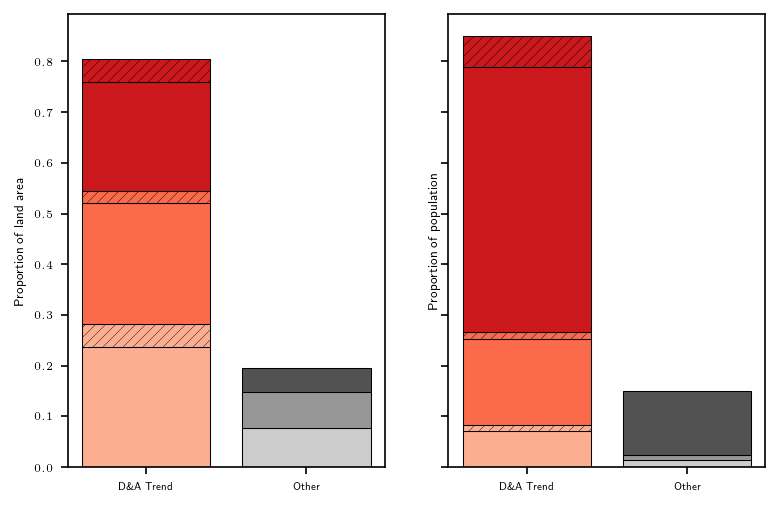

In [15]:
fig, axs = plt.subplots(1,2,dpi=150, sharey=True)

ax = axs[0]

bottoms = {0: 0.0, 1: 0.0}

hatch_types = ["","","/////"]

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
colors = reds + greys 

with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            ax.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
            
ax.set_xticks([0,1])
ax.set_xticklabels(["D\&A Trend", "Other"], fontsize=5)

ax.tick_params(axis="y",labelsize=5)

ax.set_ylabel("Proportion of land area",fontsize=6)
            
ax = axs[1]
            
bottoms = {0: 0.0, 1: 0.0}
            
with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(pop_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            ax.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
    
ax.set_xticks([0,1])
ax.set_xticklabels(["D\&A Trend", "Other"], fontsize=5)

ax.tick_params(axis="y",labelsize=5)

ax.set_ylabel("Proportion of population",fontsize=6)

In [16]:
area_sums[area_sums['evidence_cat'].isin([2,3])]['prop'].sum()

0.5224303556166865

In [17]:
area_sums[area_sums['evidence_cat'].isin([1])]['prop'].sum()

area_sums[area_sums['evidence_cat'].isin([1])]['prop'].sum()

0.2815004241737895

In [18]:
doc_continents = pd.read_csv('../data/doc_continents.csv')
doc_continents.head()

,doc_id,continent
0,1340101,NaN
1,222401,North America
2,3307272,North America
3,355004,North America
4,4603,North America


In [19]:
impact_preds = pd.read_csv('../data/1_impact_predictions.csv')
df_studies = pd.read_csv('../data/study_da.csv').merge(impact_preds)


South America
North America
Africa
Europe
Asia
Oceania


(0.0, 1.0, 0.0, 1.0)

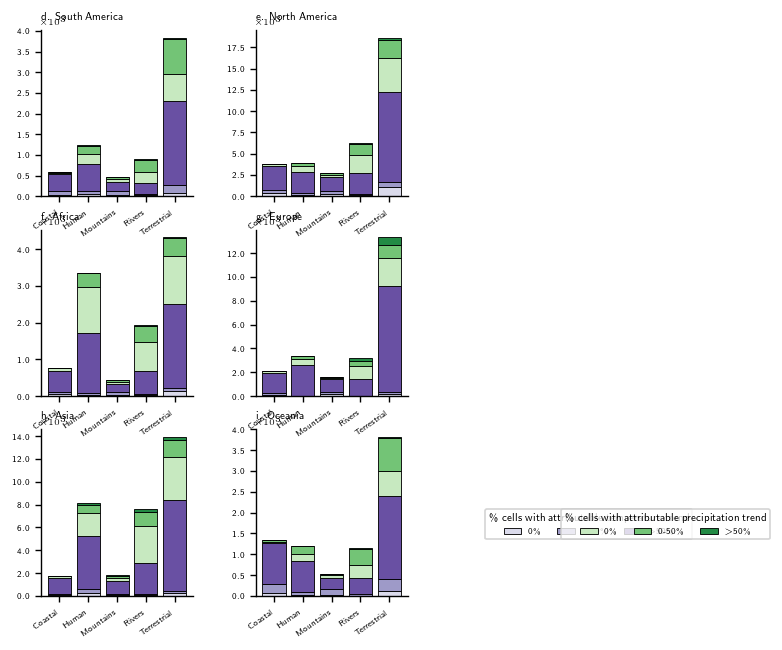

In [20]:

class OOMFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        mpl.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        #if self._useMathText:
            #self.format = r'$\mathdefault{%s}$' % self.format

def plot_continent_docs(continent, doc_continents, df_studies, sector_cols, ax, angle=35):
    colors = ["Purples","Greens"]
    group = doc_continents[doc_continents["continent"]==continent]
    print(continent)    
    ax.set_facecolor("none")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    vdf = df_studies[df_studies["id"].isin(group["doc_id"])]
    lw=0.5
    
    for i, col in enumerate(sector_cols):

        b = 0
        all_handles = []
        for j, da_var in enumerate(["temp_da_prop","precip_da_prop"]):

            cm = mpl.cm.get_cmap(colors[j])

            cdf = vdf[(vdf[col]>0.5) ]
            cdf = cdf[cdf[f'{da_var.split("_")[0]}_driver']==1]

            y = cdf[cdf[da_var]==0].shape[0]
            l1 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw,color=cm(0.25))   
            b+=y

            y = cdf[(cdf[da_var]>0) & (cdf[da_var]<0.5)].shape[0]
            l2 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.5))    
            b+=y

            y = cdf[(cdf[da_var]>0.5)].shape[0]
            l3 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.75))  
            b+=y
            
            var_handles = [l1,l2,l3]
            all_handles.append(var_handles)
            
            ticks, ticklabels = zip(*[(i, x.split(' - ')[1].split()[0].replace(',','')) for i, x in enumerate(sector_cols)])
            ax.set_xticks(ticks)
            ax.set_xticklabels(ticklabels, rotation=angle, ha="right")
            ax.tick_params(axis='both', which='major', labelsize=5)
            
            ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
            ax.yaxis.set_major_formatter(OOMFormatter(3, "%1.1f"))
            offset_text = ax.yaxis.get_offset_text()
            offset_text.set_size(5)
            
    return all_handles

sector_cols = [x for x in df_studies.columns if "12 - " in x and "mean" in x]

continents = [
    "South America", 
    "North America", 
    "Africa", 
    "Europe", 
    "Asia",
    "Oceania"
]

#########################################################
## Studies

fig = plt.figure(figsize=(6,6), dpi=125)
gs = fig.add_gridspec(3, 3, figure=fig, wspace=0.41)

colors = ["Blues","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]
lw = 0.5

for ci, continent in enumerate(continents):

    xi = ci % 2
    yi = ci // 2
    a = plt.subplot(gs[yi, xi])
    a.set_title(f"{chr(97+3+ci)}. {continent}",fontsize=6, fontweight="bold", loc="left")
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a)            


    
###############
## Bar legend

ax = plt.subplot(gs[:,2])
attrib_labels = [
    "0\%",
    "0-50\%",
    r"\textgreater50\%"
]

l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(.1,0.1),
    fontsize=5,
    ncol=3
)    
l0.set_title("\% cells with attributable temperature trend", prop={'size':6})
l1 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(0.6,0.1),
    fontsize=5,
    ncol=3
)    
l1.set_title("\% cells with attributable precipitation trend", prop={'size':6})

plt.gca().add_artist(l0)
ax.axis("off")

$\times
                                                  {10^{3}}$

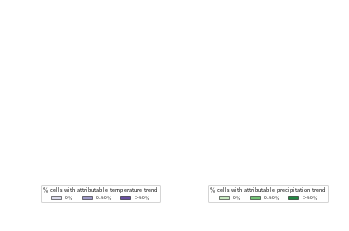

In [21]:
fig, ax = plt.subplots()

attrib_labels = [
    "0\%",
    "0-50\%",
    r"\textgreater50\%"
]

l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(.1,0.1),
    fontsize=5,
    ncol=3
)    
l0.set_title("\% cells with attributable temperature trend", prop={'size':6})
l1 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(0.6,0.1),
    fontsize=5,
    ncol=3
)    
l1.set_title("\% cells with attributable precipitation trend", prop={'size':6})

plt.gca().add_artist(l0)
ax.axis("off")

plt.savefig('../figures/tp_legend.svg')

South America
North America
Africa
Europe
Asia
Oceania


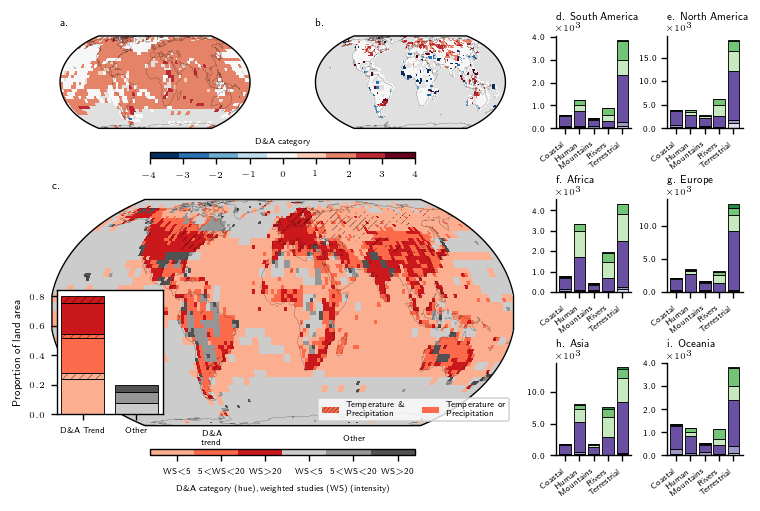

In [22]:
## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=125, constrained_layout=False)
w_r = [1,1,1,1,.82,0.82]
h_r = [1,1,0.3,0.1] * 2 + [1.7,0.3,0.3,.1]
gs = fig.add_gridspec(12, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.41, hspace=0.85)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0:2,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=6, fontweight="bold", loc="left" )
plot_da(df, axa, 'updated_temp')

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0:2,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=6, fontweight="bold", loc="left" )
mesh = plot_da(df, axb, 'updated_precip')

## Cbar
cax = plt.subplot(gs[2,:4])

cax.axis('off')
cbar = plt.colorbar(
    mesh, orientation="horizontal", ax=cax, 
    aspect=40, 
    fraction=0.6,
)
cbar.set_label('D\&A category', fontsize=5, labelpad=-23)

cbar.ax.tick_params(labelsize=5)

############################################################
## Plot summary fig

axc = plt.subplot(gs[4:9,0:4], projection=ccrs.EqualEarth())
axc.set_title('c.', fontsize=6, fontweight="bold", loc="left" )

axc.coastlines(lw=0.1)

n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
colors = reds + greys 
cmap = mpl.colors.ListedColormap(colors)

mesh = axc.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    cmap = cmap,
    transform=ccrs.PlateCarree(),
)

n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
zm = np.ma.masked_less(n, 2)
with mpl.rc_context(rc={'hatch.linewidth': .5}):

    dots = axc.pcolor(
        df.LON.unique(),
        df.LAT.unique(),
        zm, hatch="//////",
        transform=ccrs.PlateCarree(),
        alpha=0.
    )

## mesh legend

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    hatch="//////////",
    label="Temperature \&\n Precipitation",
)

axc.add_patch(rect)

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    label="Temperature or\n Precipitation",
)

axc.add_patch(rect)
axc.legend(fontsize=5, loc="lower right", ncol=2)

##

axins = axc.inset_axes([0.01,0.05,0.23,0.55])
bottoms = {0: 0.0, 1: 0.0}

hatch_types = ["","","/////"]

with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            axins.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
    
axins.set_xticks([0,1])
axins.set_xticklabels(["D\&A Trend", "Other"], fontsize=5)

axins.tick_params(axis="y",labelsize=5)

axins.set_ylabel("Proportion of land area",fontsize=6)

## Colorbar
cax = plt.subplot(gs[9:10,:4])

cbar = plt.colorbar(
    mesh, orientation="horizontal", ax=cax, pad=-0.5,
    aspect=40, fraction=0.6
)
cbar.set_ticks(np.array(np.linspace(1,cmap.N,cmap.N+1)[:-1]+0.5))

cbar.set_ticklabels([
    fr"WS\textless{little}",
    fr"{little}\textless WS\textless{lots}",
    fr"WS\textgreater{lots}"
]*2)


cax.text(0.35,1.6, "D\&A\ntrend", fontsize=5,ha="center", va="center", fontweight="bold")        
cax.text(0.65,1.6, "Other", fontsize=5,ha="center", va="center", fontweight="bold")
cbar.set_label('D\&A category (hue), weighted studies (WS) (intensity)', fontsize=5, labelpad=5)
cbar.ax.tick_params(labelsize=5)
cax.axis('off')

############################################################
##

for ci, continent in enumerate(continents):
    xi = 4+ci%2
    yi = ci//2*4
    
    a = plt.subplot(gs[yi:yi+2,xi])
    a.set_title('b.', fontsize=6, fontweight="bold", loc="left")
    a.set_title(f"{chr(97+3+ci)}. {continent}",fontsize=6, fontweight="bold", loc="left",pad=9.5)
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a, angle=38)
    
#a = plt.subplot(gs[yi+1,xi])
#ax = plt.subplot(gs[11,:4])

#ax.axis('off')
plt.savefig("../figures/figure_2.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_2.png", dpi=300, bbox_inches="tight")
plt.savefig("../figures/figure_2.svg", bbox_inches="tight")

In [23]:
shp_ndf_df = pd.read_csv('../data/2_country_data.csv')

In [235]:
np.arange(-4,4)

array([-4, -3, -2, -1,  0,  1,  2,  3])

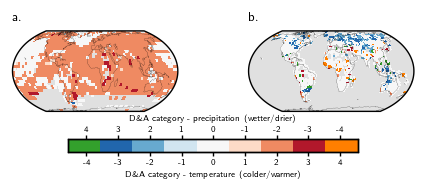

In [343]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=125, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,1,1]
h_r = [1,1,1,0.1] * 2 + [1.7,0.3,0.3,.1]
gs = fig.add_gridspec(12, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.85)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0:2,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp')

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0:2,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip')

## Cbar
cax = plt.subplot(gs[2,1:3])

def double_cbar(mesh, cax, frac):
    cax.axis('off')

    cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

    #cax.axis('off')
    cax2 = cax.twiny()
    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
        ticks=np.linspace(-3.5,3.5,9),
    )
    cax.set_xticklabels(np.arange(-4,5))
    cax2.set_xlim(-4,4)
    cax2.set_xticks(np.linspace(-3.5,3.5,9))
    cax2.set_xticklabels(np.flip(np.arange(-4,5)), fontsize=5)
    cax2.xaxis.set_tick_params(pad=1,length=2.5)
    cax.xaxis.set_tick_params(pad=1.5,length=2.5)
    cax2.set_xlabel('D\&A category - precipitation (wetter/drier)', fontsize=5,labelpad=3)
    cbar.set_label('D\&A category - temperature (colder/warmer)', fontsize=5, labelpad=2)

    cbar.ax.tick_params(labelsize=5)
    
double_cbar(mesh, cax, 0.4)

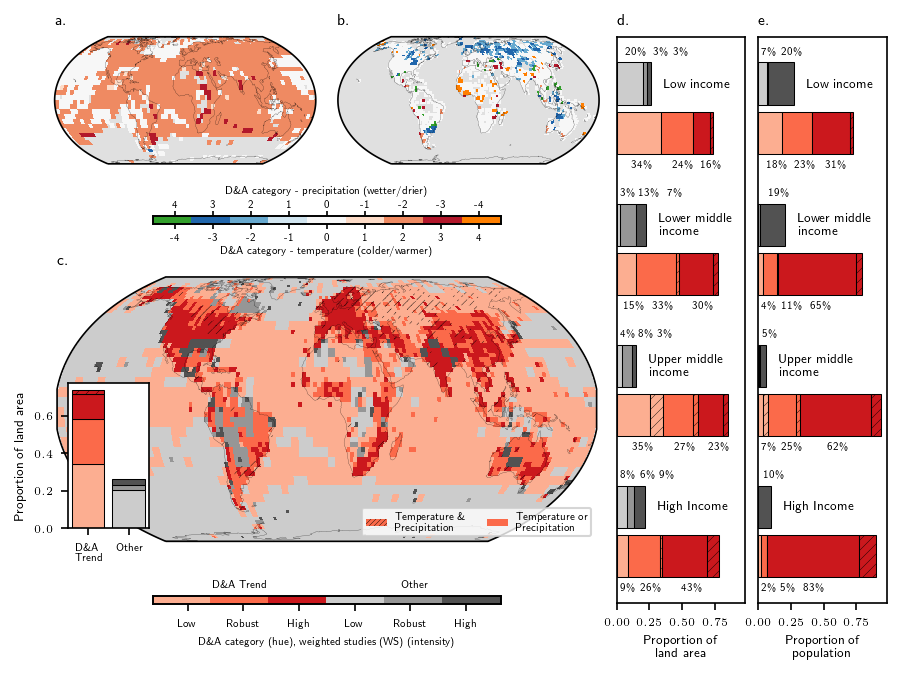

In [352]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,1,1]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp')

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip')

## Cbar
cax = plt.subplot(gs[1,1:3])

double_cbar(mesh, cax, 0.8)

############################################################
## Plot summary fig

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())
axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )

axc.coastlines(lw=0.1)

n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
colors = reds + greys 
cmap = mpl.colors.ListedColormap(colors)

mesh = axc.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    cmap = cmap,
    transform=ccrs.PlateCarree(),
)

n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
zm = np.ma.masked_less(n, 2)
with mpl.rc_context(rc={'hatch.linewidth': .5}):

    dots = axc.pcolor(
        df.LON.unique(),
        df.LAT.unique(),
        zm, hatch="//////",
        transform=ccrs.PlateCarree(),
        alpha=0.
    )

## mesh legend

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    hatch="//////////",
    label="Temperature \&\n Precipitation",
)

axc.add_patch(rect)

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    label="Temperature or\n Precipitation",
)

axc.add_patch(rect)
axc.legend(fontsize=5, loc="lower right", ncol=2)

##

axins = axc.inset_axes([0.02,0.05,0.15,0.55])
bottoms = {0: 0.0, 1: 0.0}

hatch_types = ["","","/////"]

with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            axins.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
    
axins.set_xticks([0,1])

da_labels = ["D\&A Trend", "Other"]
axins.set_xticklabels([x.replace(" ","\n") for x in da_labels], fontsize=5)

axins.tick_params(axis="y",labelsize=5)

axins.set_ylabel("Proportion of land area",fontsize=6)

## Colorbar
cax = plt.subplot(gs[3,1:3])

def rg_cbar(cax, mesh, frac):
    cax.axis('off')
    cax = cax.inset_axes([0.0,(1-frac)*0.5-frac*0.25,1,frac])
    cax2 = cax.twiny()
    cax2.set_xlim(0,6)
    cax2.set_xticks([1.5,4.5])
    cax2.set_xticklabels(["D\&A Trend","Other"],fontsize=5)
    cax2.xaxis.set_tick_params(pad=3,length=0)

    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
    )
    cbar.set_ticks(np.array(np.linspace(1.5,5.5,6)))

    cbar.set_ticklabels([
        fr"Low",
        fr"Robust",
        fr"High"
    ]*2)
    cbar.set_label('D\&A category (hue), weighted studies (WS) (intensity)', fontsize=5, labelpad=4.5)
    cbar.ax.tick_params(labelsize=5)
    
rg_cbar(cax,mesh,0.8)


offsets = [0.15,-0.15]

labels = ["Proportion of\nland area","Proportion of\npopulation"]

texts = []

axs = [plt.subplot(gs[:10,4])]

axs.append(plt.subplot(gs[:10,5],sharex=axs[0]))

for k in [0,1]:
    income_x = 0
    ax = axs[k]
    ax.set_title(f'{chr(k+100)}.', fontsize=title_fs, fontweight="bold", loc="left" )
    ax.set_xlabel(labels[k], fontsize=6)

    handles = [[],[]]
    
    for inc, group in shp_ndf_df.groupby('Income category'):
        cells = df[df['index'].isin(group['ndf_id'])]

        area_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
        area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

        pop_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
        pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
        
        sums = [area_sums, pop_sums][k]

        bottoms = {0: 0.0, 1: 0.0}
        


        with mpl.rc_context(rc={'hatch.linewidth': 2}):
            
            ys = []
            text_labels = []
            min_text_left = 0.025

            for i, (name, group) in enumerate(sums.groupby('evidence_cat')):
                x = name//4 
                if bottoms[x]==0:
                    ys = []
                y = bottoms[x]+group['prop'].sum()*0.33
                if group['prop'].sum()>0.02:
                    ys.append(max(y,min_text_left))
                    if len(ys)>1:
                        min_distance = ys[-1] - ys[-2]
                        
                        while min_distance < 0.07*len(text_labels[-1]):
                            y+=0.01
                            ys[-1] = y
                            min_distance = ys[-1] - ys[-2]
                    texts.append(ax.text(
                        max(y,min_text_left),x + income_x + offsets[int(x)]*-2, 
                        f"{group['prop'].sum():.0%}".replace("%","\%"),
                        ha="left",va="center", fontsize=5
                    ))
                    text_labels.append(f"{group['prop'].sum():.0%}")
                for j, group in group.groupby('n_da_impacts'):
                    y = group['prop'].values[0]
                    b = ax.barh(
                        x + income_x + offsets[int(x)],y, left=bottoms[x], 
                        color=colors[i], hatch=hatch_types[j],
                        edgecolor="black",
                        linewidth=0.5,
                        height=0.6
                    )
                    bottoms[x]+=y
                    if "Upper" in inc:
                        #print(int(x))
                        #print(colors[i])
                        handles[int(x)] = handles[int(x)] + [b]
                        #print([bp.patches[0].get_fc() for bp in handles[0]])
                
        ax.text(bottoms[x]+0.1, x + income_x + offsets[int(x)],inc[3:].replace('middle',"middle\n"),ha="left", va="center", fontsize=6)
        income_x+=2
        
    ax.tick_params(axis='x', labelsize=5)
        
axs[1].set_yticks([])
        
axs[0].set_yticks([])

plt.savefig("../figures/figure_2.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_2.png", dpi=300, bbox_inches="tight")
plt.savefig("../figures/figure_2.svg", bbox_inches="tight")


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:132: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[]

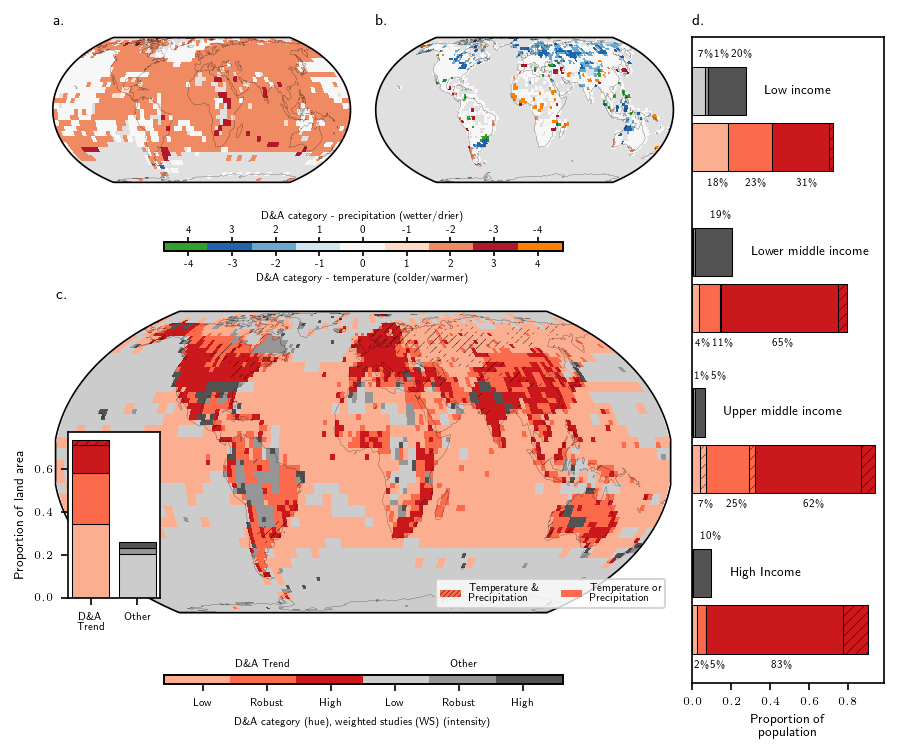

In [356]:
############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5.7), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,0.6,0.6]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp')

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip')

## Cbar
cax = plt.subplot(gs[1,1:3])
double_cbar(mesh, cax, 0.8)

############################################################
## Plot summary fig

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())
axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )

axc.coastlines(lw=0.1)

n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
colors = reds + greys 
cmap = mpl.colors.ListedColormap(colors)

mesh = axc.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    cmap = cmap,
    transform=ccrs.PlateCarree(),
)

n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
zm = np.ma.masked_less(n, 2)
with mpl.rc_context(rc={'hatch.linewidth': .5}):

    dots = axc.pcolor(
        df.LON.unique(),
        df.LAT.unique(),
        zm, hatch="//////",
        transform=ccrs.PlateCarree(),
        alpha=0.
    )

## mesh legend

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    hatch="//////////",
    label="Temperature \&\n Precipitation",
)

axc.add_patch(rect)

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    label="Temperature or\n Precipitation",
)

axc.add_patch(rect)
axc.legend(fontsize=5, loc="lower right", ncol=2)

##

axins = axc.inset_axes([0.02,0.05,0.15,0.55])
bottoms = {0: 0.0, 1: 0.0}

hatch_types = ["","","/////"]

with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            axins.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
    
axins.set_xticks([0,1])

da_labels = ["D\&A Trend", "Other"]
axins.set_xticklabels([x.replace(" ","\n") for x in da_labels], fontsize=5)

axins.tick_params(axis="y",labelsize=5)

axins.set_ylabel("Proportion of land area",fontsize=6)

## Colorbar
cax = plt.subplot(gs[3,1:3])    
rg_cbar(cax,mesh,0.8)

##########################################
## Sums

offsets = [0.15,-0.15]

labels = ["Proportion of\nland area","Proportion of\npopulation"]

texts = []

axs = [plt.subplot(gs[:,4:])]

#axs.append(plt.subplot(gs[:11,5],sharex=axs[0]))

for k in [1]:
    income_x = 0
    ax = plt.subplot(gs[:11,4:])
    ax.set_xlabel(labels[k], fontsize=6)
    
    ax.set_title("d.", fontsize=title_fs, fontweight="bold", loc="left" )

    handles = [[],[]]
    
    for inc, group in shp_ndf_df.groupby('Income category'):
        cells = df[df['index'].isin(group['ndf_id'])]

        area_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
        area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

        pop_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
        pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
        
        sums = [area_sums, pop_sums][k]

        bottoms = {0: 0.0, 1: 0.0}
        


        with mpl.rc_context(rc={'hatch.linewidth': 2}):
            
            ys = []
            


            for i, (name, group) in enumerate(sums.groupby('evidence_cat')):
                x = name//4 
                if bottoms[x]==0:
                    ys = []
                y = bottoms[x]+group['prop'].sum()*0.4
                if y>0.007:
                    ys.append(max(y,0.01))
                    if len(ys)>1:
                        min_distance = np.min([abs(x[0]-x[1]) for x in itertools.combinations(ys,2)])
                        while min_distance < 0.08:
                            y+=0.01
                            ys[-1] = y
                            min_distance = np.min([abs(x[0]-x[1]) for x in itertools.combinations(ys,2)])
                    texts.append(ax.text(
                        max(y,0.01),x + income_x + offsets[int(x)]*-2, 
                        f"{group['prop'].sum():.0%}".replace("%","\%"),
                        ha="left",va="center", fontsize=5
                    ))
                for j, group in group.groupby('n_da_impacts'):
                    y = group['prop'].values[0]
                    b = ax.barh(
                        x + income_x + offsets[int(x)],y, left=bottoms[x], 
                        color=colors[i], hatch=hatch_types[j],
                        edgecolor="black",
                        linewidth=0.5,
                        height=0.6
                    )
                    bottoms[x]+=y
                    if "Upper" in inc:
                        #print(int(x))
                        #print(colors[i])
                        handles[int(x)] = handles[int(x)] + [b]
                        #print([bp.patches[0].get_fc() for bp in handles[0]])
                        
                        
        ax.text(bottoms[x]+0.1, x + income_x + offsets[int(x)],inc[3:],ha="left", va="center", fontsize=6)

        income_x+=2
        
    ax.tick_params(axis='x', labelsize=5)
        
        
axs[0].set_yticks([])
#axs[0].set_yticklabels(["High income", "Upper middle\nincome","Lower middle\nincome","Low income"], fontsize=5)

# plt.savefig("../figures/figure_2_single.pdf", bbox_inches="tight")
# plt.savefig("../figures/figure_2_single.png", dpi=300, bbox_inches="tight")
# plt.savefig("../figures/figure_2_single.svg", bbox_inches="tight")

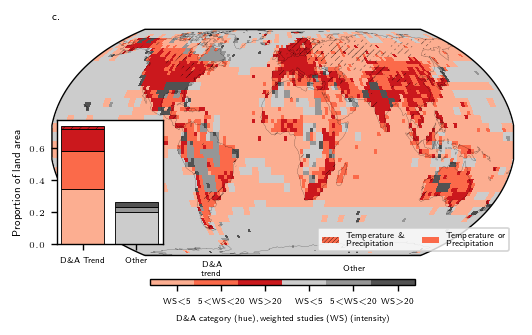

In [26]:
## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=125, constrained_layout=False)
w_r = [1,1,1,1,.82,0.82]
h_r = [1,1,0.3,0.1] * 2 + [1.7,0.3,0.3,.1]
gs = fig.add_gridspec(12, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.41, hspace=0.85)

cbar.ax.tick_params(labelsize=5)

############################################################
## Plot summary fig

axc = plt.subplot(gs[4:9,0:4], projection=ccrs.EqualEarth())
axc.set_title('c.', fontsize=6, fontweight="bold", loc="left" )

axc.coastlines(lw=0.1)

n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
colors = reds + greys 
cmap = mpl.colors.ListedColormap(colors)

mesh = axc.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    cmap = cmap,
    transform=ccrs.PlateCarree(),
)

n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
zm = np.ma.masked_less(n, 2)
with mpl.rc_context(rc={'hatch.linewidth': .5}):

    dots = axc.pcolor(
        df.LON.unique(),
        df.LAT.unique(),
        zm, hatch="//////",
        transform=ccrs.PlateCarree(),
        alpha=0.
    )

## mesh legend

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    hatch="//////////",
    label="Temperature \&\n Precipitation",
)

axc.add_patch(rect)

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    label="Temperature or\n Precipitation",
)

axc.add_patch(rect)
axc.legend(fontsize=5, loc="lower right", ncol=2)

##

axins = axc.inset_axes([0.01,0.05,0.23,0.55])
bottoms = {0: 0.0, 1: 0.0}

hatch_types = ["","","/////"]

with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            axins.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
    
axins.set_xticks([0,1])
axins.set_xticklabels(["D\&A Trend", "Other"], fontsize=5)

axins.tick_params(axis="y",labelsize=5)

axins.set_ylabel("Proportion of land area",fontsize=6)

## Colorbar
cax = plt.subplot(gs[9:10,:4])

cbar = plt.colorbar(
    mesh, orientation="horizontal", ax=cax, pad=-0.5,
    aspect=40, fraction=0.6
)
cbar.set_ticks(np.array(np.linspace(1,cmap.N,cmap.N+1)[:-1]+0.5))

cbar.set_ticklabels([
    fr"WS\textless{little}",
    fr"{little}\textless WS\textless{lots}",
    fr"WS\textgreater{lots}"
]*2)


cax.text(0.35,1.6, "D\&A\ntrend", fontsize=5,ha="center", va="center", fontweight="bold")        
cax.text(0.65,1.6, "Other", fontsize=5,ha="center", va="center", fontweight="bold")
cbar.set_label('D\&A category (hue), weighted studies (WS) (intensity)', fontsize=5, labelpad=5)
cbar.ax.tick_params(labelsize=5)
cax.axis('off')

#ax.axis('off')
#plt.savefig("../figures/figure_2.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_2c.png", dpi=300, bbox_inches="tight")
#plt.savefig("../figures/figure_2.svg", bbox_inches="tight")

In [27]:
cmap.N

6

In [28]:
doc_info = pd.read_csv('../data/0c_doc_info.csv')

impact_df = pd.read_csv('../data/1_impact_predictions.csv')
driver_df = pd.read_csv('../data/1_driver_predictions.csv')
predictions = pd.read_csv('../data/1_document_relevance.csv')

study_df = driver_df.merge(impact_df).merge(predictions).merge(doc_info)
print(study_df.shape)

doc_continents = pd.read_csv('../data/doc_continents.csv').merge(pd.read_csv('../data/1_document_relevance.csv'), left_on="doc_id",right_on="id")
doc_continents.head()

study_df.head()

(163853, 40)


,id,6 - Temperature - mean_prediction,6 - Temperature - std_prediction,6 - Temperature - lower_pred,6 - Temperature - upper_pred,6 - Precipitation - mean_prediction,6 - Precipitation - std_prediction,6 - Precipitation - lower_pred,6 - Precipitation - upper_pred,6 - Other - mean_prediction,...,12 - Terrestrial ES - std_prediction,12 - Terrestrial ES - lower_pred,12 - Terrestrial ES - upper_pred,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred,PY,title,wosarticle__dt
0,1300115,0.599319,0.123371,0.475948,0.722689,0.039122,0.007976,0.031147,0.047098,0.438100,...,0.002949,0.039941,0.045840,0.898821,0.094973,0.803848,0.993795,2018.0,Oceanographic mechanisms and penguin populatio...,Article
1,626619,0.163634,0.046660,0.116974,0.210294,0.244802,0.041110,0.203692,0.285913,0.634133,...,0.016406,0.049240,0.082053,0.503902,0.382881,0.121021,0.886782,2001.0,Effect of basin physical characteristics on so...,Article
2,3910065,0.276482,0.167964,0.108517,0.444446,0.765776,0.082619,0.683157,0.848395,0.224603,...,0.021662,0.060729,0.104052,0.428647,0.292183,0.136463,0.720830,2018.0,Evaluation of the Oceanic Niño Index as a deci...,Article
3,2317601,0.613144,0.223667,0.389477,0.836811,0.183233,0.014026,0.169207,0.197258,0.300958,...,0.162642,0.083915,0.409199,0.794071,0.135684,0.658387,0.929755,2017.0,The Impact of Wind on the Economic Activities ...,Article
4,618304,0.867647,0.054082,0.813565,0.921728,0.036531,0.008577,0.027954,0.045109,0.137281,...,0.098717,0.565640,0.763074,0.970139,0.012548,0.957591,0.982688,2011.0,Warming alters the size spectrum and shifts th...,Article


0.5641895835477563
0.18456063729511282
0.2948002005274155
0.23247903843315937
0.03730106508944715
0.01362689522646478
(-0.079135002979485, 1.0791350029794848)


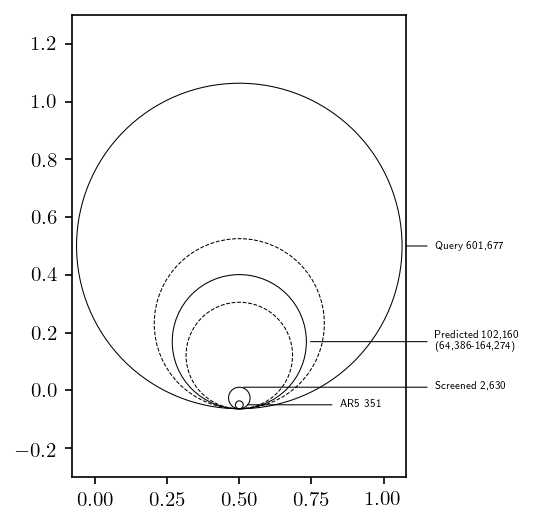

In [29]:
from matplotlib.patches import Circle
import math

predictions = pd.read_csv('../data/1_document_relevance.csv')
seen_df = pd.read_csv('../data/0_labelled_documents.csv')

fig, ax = plt.subplots(dpi=150, figsize=(3.6,3.6))

query_size = predictions.shape[0]
predicted_size = predictions[predictions['0 - relevance - mean_prediction']>0.5].shape[0]
upper_pred_size = predictions[predictions['0 - relevance - upper_pred']>0.5].shape[0]
lower_pred_size = predictions[predictions['0 - relevance - lower_pred']>0.5].shape[0]
screened_size = seen_df.shape[0]
ar5 = pd.read_csv('../literature_identification/IPCC_extraction.csv')
ar5_size = ar5.shape[0]

max_area = query_size

cols=["black","black","black","black"]
fill_cols = ['#7fc97f','#beaed4','#fdc086','#ffff99']

fill_cols = ["None"] * 4

fill_cols.reverse()
lw = .5

def draw_circle(label, size, max_size, ax, col, max_r=None, ytop=False, dotted=False, bounds="",label_offset=1.18):
    r = math.sqrt(size/max_size/math.pi)
    print(r)
    if dotted:
        ls = "--"
    else:
        ls = "-"
    if max_r is None:
        max_r = r
        y = 0.5
    else:
        y = 0.5-(max_r-r)
    circle = Circle(
        (0.5,y), r,
        color=col,
        ec="black",
        lw=lw,
        ls=ls,
        clip_on=False
    )
    ax.add_patch(circle)
    if ytop:
        ylab = y+r
        xlab = 0.5
    else:
        ylab = y
        xlab = 0.5+r
    if label:
        ax.annotate(
            f"{label} {size:,} {bounds}", (xlab,ylab), (label_offset,ylab), 
            arrowprops={"arrowstyle": "-",  "linewidth":0.5}, va="center",
            fontsize=5, annotation_clip=False
        )
    return r

#Query docs
max_r = draw_circle("Query", query_size, query_size, ax, fill_cols[0])
r = draw_circle(None, lower_pred_size, query_size, ax, fill_cols[1], max_r, dotted=True)
r = draw_circle(None, upper_pred_size, query_size, ax, fill_cols[1], max_r, dotted=True)
r = draw_circle("Predicted", predicted_size, query_size, ax, fill_cols[1], max_r, bounds=f"\n({lower_pred_size:,}-{upper_pred_size:,})")
r = draw_circle("Screened", screened_size, query_size, ax, fill_cols[2], max_r, True)
r = draw_circle("AR5", ar5_size, query_size, ax, fill_cols[3], max_r, False, label_offset=0.85)

ax.axis('equal')
ax.margins(0)
#ax.axis('off')

fig.tight_layout()

print(ax.get_xlim())

plt.show()

FAR
802 (457-1452)
SAR
2106 (1208-3534)
TAR
5009 (2985-8412)
AR4
10447 (6700-16707)
AR5
28513 (17832-45077)
AR6
46442 (34473-87861)
0.5641895835477563
0.18456063729511282
0.2948002005274155
0.23247903843315937
0.03730106508944715
0.01362689522646478
South America
North America
Africa
Europe
Asia
Oceania


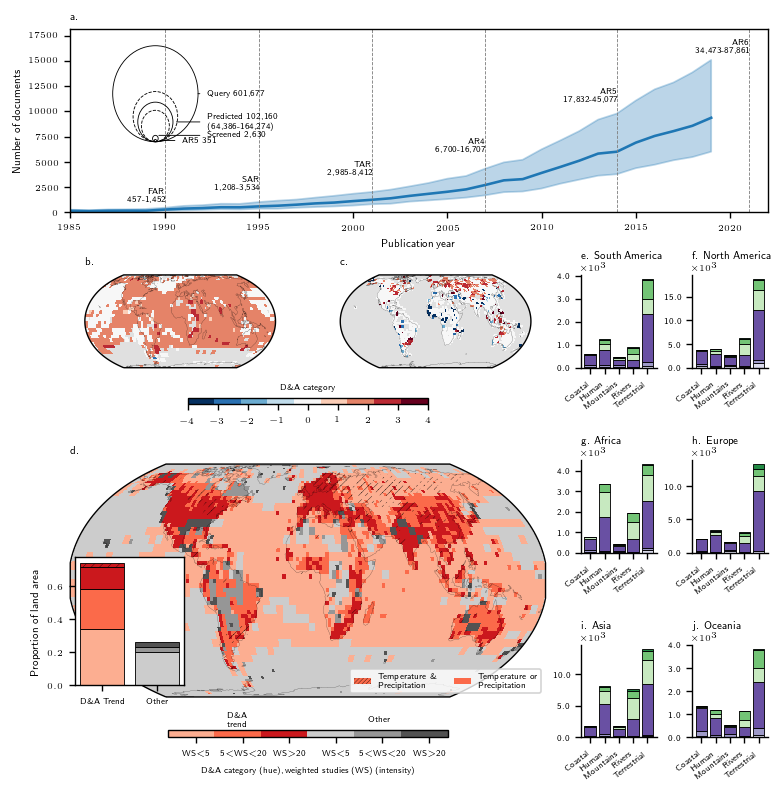

In [30]:
## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,8.2), dpi=125, constrained_layout=False)
w_r = [1,1,1,1,.82,0.82]
h_r = [5.5,0.3] + [1,1,0.3,0.1] * 2 + [1.7,0.3,0.3,.1]
gs = fig.add_gridspec(14, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.41, hspace=0.85)

###########################################################
## Figure 1

#########################
## Time+uncertainty
ax = plt.subplot(gs[0,:])


lb = study_df[study_df['0 - relevance - lower_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"lb"})
mid = study_df[study_df['0 - relevance - mean_prediction']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"mid"})
ub = study_df[study_df['0 - relevance - upper_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"ub"})

mid = mid[mid['PY']<2020]

bounds = lb.merge(ub, how="outer")

bounds = bounds[bounds['PY']<2020]

ax.plot(mid['PY'], mid['mid'], color="C0")

ax.fill_between(
    bounds['PY'], bounds['lb'], bounds['ub'],
    color="C0",
    alpha=0.3
)

ax.set_xlim([1985,2019])

ax.set_xlabel('Publication year', fontsize=6)
ax.set_ylabel('Number of documents', fontsize=6)

ax.tick_params(axis='both', labelsize=5) 

report_dates = [1990, 1995, 2001, 2007, 2014, 2021]
report_labels = ["FAR", "SAR", "TAR", "AR4", "AR5", "AR6"]

ymax = ub['ub'].max()

ld = 0

offsets = [350, 1000, 1500, 1500, 1000, 500]

for i, (d, l) in enumerate(zip(report_dates, report_labels)):
    #idx = py_range.index(d)
    print(l)
    # bounds for this reporting period
    r_m = mid[mid['PY'].isin(range(ld,d))]['mid'].sum()
    r_lb = lb[lb['PY'].isin(range(ld,d))]['lb'].sum()
    r_ub = ub[ub['PY'].isin(range(ld,d))]['ub'].sum()
    
    print(f"{r_m} ({r_lb}-{r_ub})")
    

    
    if l=="AR6":
        y = ub.ub.max()
        ty = y+offsets[i]
        ax.axvline(d, color="grey",lw=0.5, ls="--")
        ax.text(d, ty, f"{l}\n{r_lb:,}-{r_ub:,}", va="bottom", ha="right", fontsize=5)
    else:
        y = ub[ub['PY']==d].ub.values[0]
        ty = y+offsets[i]
        ax.axvline(d, color="grey",lw=0.5, ls="--")
        ax.text(d, ty, f"{l}\n{r_lb:,}-{r_ub:,}", va="bottom", ha="right", fontsize=5)

    ld=d

ax.set_xlim([1985,2022])
ax.set_ylim([0,ymax*1.2])
ax.set_title("a.", fontsize=6, loc="left", fontweight="black")


####################
## 
# Inset axis 
ax = ax.inset_axes([0.00,0.4,0.32,0.6])
fill_cols = ["None"] * 4

#Query docs
max_r = draw_circle("Query", query_size, query_size, ax, fill_cols[0])
r = draw_circle(None, lower_pred_size, query_size, ax, fill_cols[1], max_r, dotted=True)
r = draw_circle(None, upper_pred_size, query_size, ax, fill_cols[1], max_r, dotted=True)
r = draw_circle("Predicted", predicted_size, query_size, ax, fill_cols[1], max_r, bounds=f"\n({lower_pred_size:,}-{upper_pred_size:,})")
r = draw_circle("Screened", screened_size, query_size, ax, fill_cols[2], max_r, True)
r = draw_circle("AR5", ar5_size, query_size, ax, fill_cols[3], max_r, False, label_offset=0.85)

ax.axis('equal')
ax.axis('off')
ax.set_xlim(xmin=0.4, xmax=1.3)
ax.set_ylim(ymin=0.1)


############################################################
## Plot Temperature

axa = plt.subplot(gs[2:4,0:2], projection=ccrs.EqualEarth())
axa.set_title('b.', fontsize=6, fontweight="bold", loc="left" )
plot_da(df, axa, 'updated_temp')

############################################################
## Plot Precipitation

axb = plt.subplot(gs[2:4,2:4], projection=ccrs.EqualEarth())
axb.set_title('c.', fontsize=6, fontweight="bold", loc="left" )
mesh = plot_da(df, axb, 'updated_precip')

## Cbar
cax = plt.subplot(gs[4,:4])

cax.axis('off')
cbar = plt.colorbar(
    mesh, orientation="horizontal", ax=cax, 
    aspect=40, 
    fraction=0.6,
)
cbar.set_label('D\&A category', fontsize=5, labelpad=-23)

cbar.ax.tick_params(labelsize=5)

############################################################
## Plot summary fig

axc = plt.subplot(gs[6:11,0:4], projection=ccrs.EqualEarth())
axc.set_title('d.', fontsize=6, fontweight="bold", loc="left" )

axc.coastlines(lw=0.1)

n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
colors = reds + greys 
cmap = mpl.colors.ListedColormap(colors)

mesh = axc.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    cmap = cmap,
    transform=ccrs.PlateCarree(),
)

n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
zm = np.ma.masked_less(n, 2)
with mpl.rc_context(rc={'hatch.linewidth': .5}):

    dots = axc.pcolor(
        df.LON.unique(),
        df.LAT.unique(),
        zm, hatch="//////",
        transform=ccrs.PlateCarree(),
        alpha=0.
    )

## mesh legend

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    hatch="//////////",
    label="Temperature \&\n Precipitation",
)

axc.add_patch(rect)

rect = Rectangle(
    (0, 0),0,0,
    facecolor=reds[1],
    label="Temperature or\n Precipitation",
)

axc.add_patch(rect)
axc.legend(fontsize=5, loc="lower right", ncol=2)

##

axins = axc.inset_axes([0.01,0.05,0.23,0.55])
bottoms = {0: 0.0, 1: 0.0}

hatch_types = ["","","/////"]

with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            axins.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
    
axins.set_xticks([0,1])
axins.set_xticklabels(["D\&A Trend", "Other"], fontsize=5)

axins.tick_params(axis="y",labelsize=5)

axins.set_ylabel("Proportion of land area",fontsize=6)

## Colorbar
cax = plt.subplot(gs[11:12,:4])

cbar = plt.colorbar(
    mesh, orientation="horizontal", ax=cax, pad=-0.5,
    aspect=40, fraction=0.7
)
cbar.set_ticks(np.array(np.linspace(1,cmap.N,cmap.N+1)[:-1]+0.5))

cbar.set_ticklabels([
    fr"WS\textless{little}",
    fr"{little}\textless WS\textless{lots}",
    fr"WS\textgreater{lots}"
]*2)


cax.text(0.35,2, "D\&A\ntrend", fontsize=5,ha="center", va="center", fontweight="bold")        
cax.text(0.65,2, "Other", fontsize=5,ha="center", va="center", fontweight="bold")
cbar.set_label('D\&A category (hue), weighted studies (WS) (intensity)', fontsize=5, labelpad=5)
cbar.ax.tick_params(labelsize=5)
cax.axis('off')

############################################################
##

for ci, continent in enumerate(continents):
    xi = 4+ci%2
    yi = ci//2*4+2
    
    a = plt.subplot(gs[yi:yi+2,xi])
    a.set_title(f"{chr(97+4+ci)}. {continent}",fontsize=6, fontweight="bold", loc="left",pad=9.5)
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a, angle=38)
    

plt.savefig("../figures/figure_1_2.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_1_2.png", dpi=300, bbox_inches="tight")
plt.savefig("../figures/figure_1_2.svg", bbox_inches="tight")

In [31]:
df_studies[(df_studies['temp_da_prop']>0) | (df_studies['precip_da_prop']>0)].shape

(85227, 36)

In [32]:
driver_preds = pd.read_csv('../data/1_driver_predictions.csv')
relevance_preds = pd.read_csv('../data/1_document_relevance.csv')
impact_drivers = impact_preds.merge(driver_preds).merge(relevance_preds)

impact_drivers = impact_drivers[impact_drivers['0 - relevance - mean_prediction']>=0.5]

print(impact_drivers.shape)

impact_drivers = impact_drivers[impact_drivers['id'].isin(doc_continents.doc_id)]

print(impact_drivers.shape)

impact_drivers['tp'] = 0
impact_drivers.loc[(impact_drivers['6 - Temperature - mean_prediction']>=0.5) | (impact_drivers['6 - Precipitation - mean_prediction']>=0.5),"tp"]=1

impact_drivers.head()

(101739, 37)
(78542, 37)


,id,12 - Coastal and marine Ecosystems - mean_prediction,12 - Coastal and marine Ecosystems - std_prediction,12 - Coastal and marine Ecosystems - lower_pred,12 - Coastal and marine Ecosystems - upper_pred,12 - Human and managed - mean_prediction,12 - Human and managed - std_prediction,12 - Human and managed - lower_pred,12 - Human and managed - upper_pred,"12 - Mountains, snow and ice - mean_prediction",...,6 - Precipitation - upper_pred,6 - Other - mean_prediction,6 - Other - std_prediction,6 - Other - lower_pred,6 - Other - upper_pred,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred,tp
0,1304560,0.048914,0.006460,0.042455,0.055374,0.872455,0.039050,0.833404,0.911505,0.042727,...,0.043249,0.115501,0.022495,0.093006,0.137996,0.943324,0.036656,0.906667,0.979980,1
2,635990,0.858577,0.048666,0.809912,0.907243,0.045016,0.001041,0.043975,0.046056,0.026559,...,0.054051,0.102301,0.013691,0.088610,0.115992,0.933471,0.051713,0.881758,0.985183,1
6,1491383,0.043460,0.010350,0.033111,0.053810,0.049785,0.013432,0.036353,0.063217,0.805671,...,0.193940,0.279420,0.273366,0.006054,0.552786,0.720637,0.226405,0.494232,0.947042,1
8,617340,0.353666,0.302710,0.050956,0.656375,0.033609,0.006447,0.027162,0.040056,0.026903,...,0.337671,0.728429,0.086409,0.642020,0.814838,0.573782,0.378272,0.195510,0.952053,0
10,2326636,0.908654,0.014982,0.893672,0.923635,0.047103,0.003010,0.044094,0.050113,0.035534,...,0.125654,0.737923,0.121887,0.616036,0.859810,0.696505,0.289601,0.406903,0.986106,0


In [33]:
impact_drivers.groupby("tp")['id'].count()

tp
0    17555
1    60987
Name: id, dtype: int64

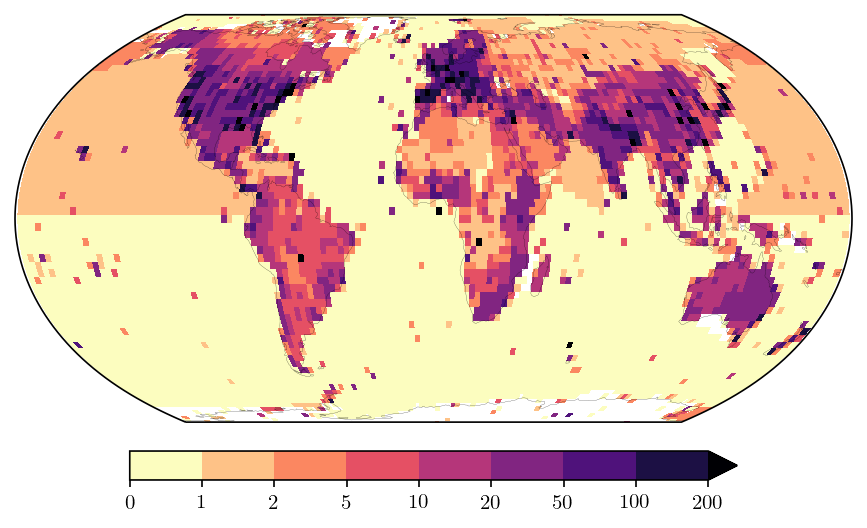

In [34]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch, ConnectionStyle

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

colors = ["Reds","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]


lw = 0.5

cols = 2

fig = plt.figure(dpi=150,figsize=(7.2,6))

gs = gridspec.GridSpec(3, 6, height_ratios=[.1, .3, 1,], bottom=.05, top=.95, wspace=.5, hspace=0.00)

ax = plt.subplot(gs[2, :], projection=ccrs.EqualEarth())


n = np.array(df.all_study_prop).reshape(len(df.LAT.unique()), len(df.LON.unique()))
vm = n.max()
n[n==0] = np.nan

bounds = np.array([0,1,2,5,10,20,50,100,200])
cmap_mgm = plt.cm.get_cmap('magma_r',len(bounds))
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors[:-1], "")
cmap.set_over(colors[-1])

ax.coastlines(lw=0.1)
mesh = ax.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)-1,clip=False),
    #cmap=plt.cm.get_cmap('YlOrBr',vm/3-1), 
    #cmap = "YlOrBr",
    cmap = cmap,
#     norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
#     cmap=plt.cm.get_cmap('YlOrBr',12), 
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
cbar = plt.colorbar(mesh, orientation="horizontal", fraction=0.05, pad=0.05, extend="max")

(0.32, 0.35)
(0.3, 0.8)
(0.5, 0.6)
(0.52, 0.85)
(0.75, 0.75)
(0.87, 0.33)


(0.0, 1.0, 0.0, 1.0)

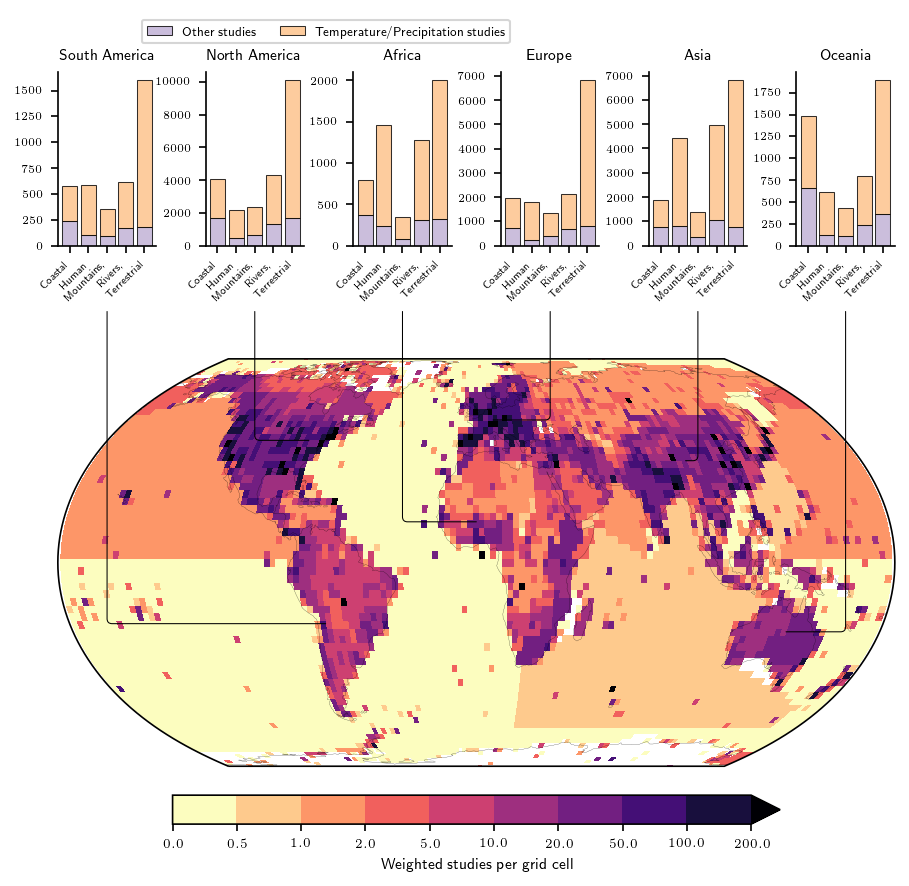

In [76]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch, ConnectionStyle

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

colors = ["Reds","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]


lw = 0.5

cols = 2

fig = plt.figure(dpi=150,figsize=(7.2,6))

gs = gridspec.GridSpec(3, 6, height_ratios=[.1, .3, 1,], bottom=.05, top=.95, wspace=.5, hspace=0.00)

ax = plt.subplot(gs[2, :], projection=ccrs.EqualEarth())


n = np.array(df.all_study_prop).reshape(len(df.LAT.unique()), len(df.LON.unique()))
vm = n.max()
n[n==0] = np.nan

bounds = np.array([0,0.5,1,2,5,10,20,50,100,200])
cmap_mgm = plt.cm.get_cmap('magma_r',len(bounds))
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors[:-1], "")
cmap.set_over(colors[-1])

ax.coastlines(lw=0.1)
mesh = ax.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)-1,clip=False),
    #cmap=plt.cm.get_cmap('YlOrBr',vm/3-1), 
    #cmap = "YlOrBr",
    cmap = cmap,
#     norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
#     cmap=plt.cm.get_cmap('YlOrBr',12), 
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
cbar = plt.colorbar(mesh, orientation="horizontal", fraction=0.05, pad=0.05, extend="max")

cbar.set_label("Weighted studies per grid cell", fontsize=7)
cbar.ax.tick_params(labelsize=6)

continents = [
    "South America", 
    "North America", 
    "Africa", 
    "Europe", 
    "Asia",
    "Oceania"
]

continent_labels = [
    (0.32,0.35),
    (0.3,0.8),
    (0.5,0.6),
    (0.52,0.85),
    (0.75,0.75),
    (0.87,0.33),
]

#for ci, (continent, group) in enumerate(places.groupby('continent')):
    
for ci, continent in enumerate(continents):
    
    
    a = plt.subplot(gs[1,ci])
    
#     all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a, angle=38)
    
    
    group = doc_continents[(doc_continents["continent"]==continent) & doc_continents["doc_id"].isin(impact_drivers.id)]
    
    a.set_facecolor("none")
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    
    
    xy = (0.5, -0.38)
    
    mxy = continent_labels[ci]
    print(mxy)
    con = ConnectionPatch(xyA=xy, coordsA=a.transAxes,
                          xyB=mxy, coordsB=ax.transAxes,
                          connectionstyle=ConnectionStyle.Angle(angleA=90, rad=5),
                          linewidth=0.5
                         )
    fig.add_artist(con)

    
    vdf = impact_drivers[impact_drivers["id"].isin(group["doc_id"])]
    
    bcs = ['#beaed4','#fdc086']
    all_handles = []
    
    for i, col in enumerate(sector_cols):

        b = 0
        
        for j, (name, group) in enumerate(vdf.groupby("tp")):
            y = group[group[col]>=0.5].shape[0]
            bar = a.bar(i, y, bottom=b, color=bcs[j], alpha=0.8, lw=0.5, ec="black")
            if i==0:
                all_handles.append(bar)
            b+=y

            
    ticks, ticklabels = zip(*[(i, x.split(' - ')[1].split()[0]) for i, x in enumerate(sector_cols)])
    a.set_xticks(ticks)
    a.set_xticklabels(ticklabels, rotation=45, ha="right")
        
    a.set_title(continent, fontsize=7)
        
    a.tick_params(axis='both', which='major', labelsize=5)
    
ax = plt.subplot(gs[0,:])

l0 = ax.legend(
    all_handles, ["Other studies","Temperature/Precipitation studies"], 
    loc=(.1,0.5),
    fontsize=6,
    ncol=2
)    

ax.axis("off")
    
# plt.savefig('../figures/figure_3.png', dpi=300, bbox_inches="tight")
# plt.savefig('../figures/figure_3.svg', bbox_inches="tight")
# plt.savefig('../figures/figure_3.pdf', bbox_inches="tight")

South America
North America
Africa
Europe
Asia
Oceania


(0.0, 1.0, 0.0, 1.0)

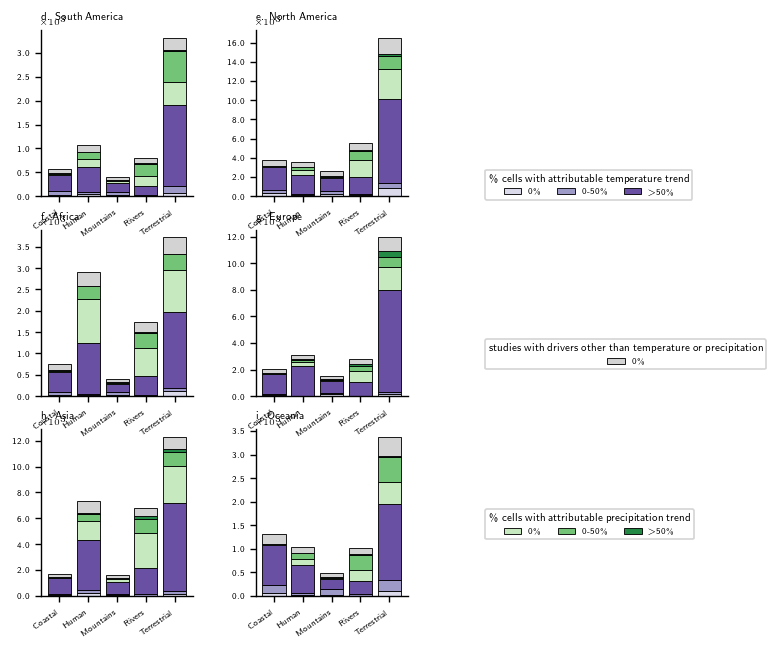

In [83]:

class OOMFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        mpl.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        #if self._useMathText:
            #self.format = r'$\mathdefault{%s}$' % self.format

def plot_continent_docs(continent, doc_continents, df_studies, sector_cols, ax, angle=35):
    colors = ["Purples","Greens"]
    group = doc_continents[doc_continents["continent"]==continent]
    print(continent)    
    ax.set_facecolor("none")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    vdf = df_studies[df_studies["id"].isin(group["doc_id"])]
    lw=0.5
    
    
    
    for i, col in enumerate(sector_cols):

        b = 0
        all_handles = []
        for j, da_var in enumerate([("temp_da_prop","6 - Temperature - mean_prediction"),("precip_da_prop","6 - Precipitation - mean_prediction")]):

            cm = mpl.cm.get_cmap(colors[j])

            cdf = vdf[(vdf[col]>=0.5) ]
            cdf = cdf[cdf[da_var[1]]>=0.5]

            y = cdf[cdf[da_var[0]]==0].shape[0]
            l1 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw,color=cm(0.25))   
            b+=y

            y = cdf[(cdf[da_var[0]]>0) & (cdf[da_var[0]]<0.5)].shape[0]
            l2 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.5))    
            b+=y

            y = cdf[(cdf[da_var[0]]>0.5)].shape[0]
            l3 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.75))  
            b+=y
            
            var_handles = [l1,l2,l3]
            all_handles.append(var_handles)
            
        cdf = vdf[(vdf[col]>=0.5) ]
        cdf = cdf[cdf[["6 - Temperature - mean_prediction","6 - Precipitation - mean_prediction"]].max(axis=1)<0.5]
        y = cdf.shape[0]
            
        l4 = ax.bar(i,y, bottom=b, edgecolor="black",lw=lw, color="lightgrey")
        all_handles.append([l4])
            
    ticks, ticklabels = zip(*[(i, x.split(' - ')[1].split()[0].replace(',','')) for i, x in enumerate(sector_cols)])
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticklabels, rotation=angle, ha="right")
    ax.tick_params(axis='both', which='major', labelsize=5)

    ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
    ax.yaxis.set_major_formatter(OOMFormatter(3, "%1.1f"))
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_size(5)
            
    return all_handles

sector_cols = [x for x in df_studies.columns if "12 - " in x and "mean" in x]

continents = [
    "South America", 
    "North America", 
    "Africa", 
    "Europe", 
    "Asia",
    "Oceania"
]

#########################################################
## Studies

fig = plt.figure(figsize=(6,6), dpi=125)
gs = fig.add_gridspec(3, 3, figure=fig, wspace=0.41)

colors = ["Blues","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]
lw = 0.5

for ci, continent in enumerate(continents):

    xi = ci % 2
    yi = ci // 2
    a = plt.subplot(gs[yi, xi])
    a.set_title(f"{chr(97+3+ci)}. {continent}",fontsize=6, fontweight="bold", loc="left")
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a)            


    
###############
## Bar legend

ax = plt.subplot(gs[:,2])
attrib_labels = [
    "0\%",
    "0-50\%",
    r"\textgreater50\%"
]

l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(.1,0.7),
    fontsize=5,
    ncol=3
)    
l0.set_title("\% cells with attributable temperature trend", prop={'size':6})

l1 = ax.legend(
    all_handles[2], attrib_labels, 
    loc=(.1,0.4),
    fontsize=5,
    ncol=3
)    
l1.set_title("studies with drivers other than temperature or precipitation", prop={'size':6})

l2 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(0.1,0.1),
    fontsize=5,
    ncol=3
)    
l2.set_title("\% cells with attributable precipitation trend", prop={'size':6})

plt.gca().add_artist(l0)
plt.gca().add_artist(l1)
ax.axis("off")

South America
North America
Africa
Europe
Asia
Oceania


(0.0, 1.0, 0.0, 1.0)

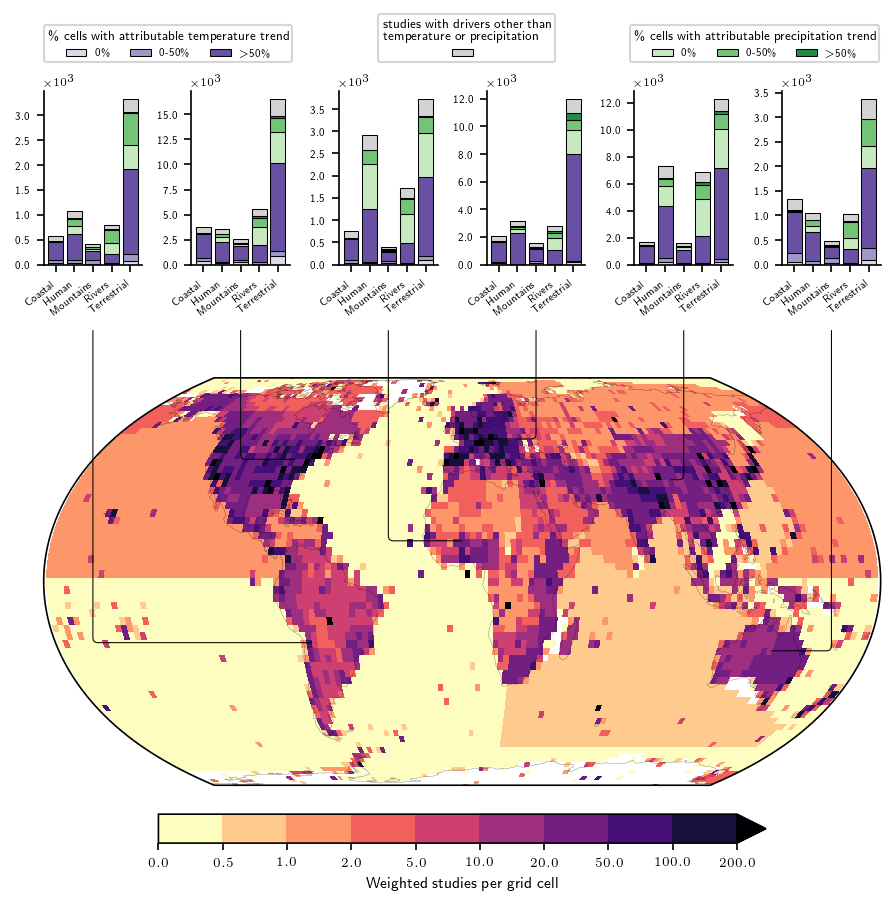

In [357]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch, ConnectionStyle

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

colors = ["Reds","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]


lw = 0.5

cols = 2

fig = plt.figure(dpi=150,figsize=(7.2,6))

gs = gridspec.GridSpec(3, 6, height_ratios=[.1, .3, 1,], bottom=.05, top=.95, wspace=.5, hspace=0.00)

ax = plt.subplot(gs[2, :], projection=ccrs.EqualEarth())


n = np.array(df.all_study_prop).reshape(len(df.LAT.unique()), len(df.LON.unique()))
vm = n.max()
n[n==0] = np.nan

bounds = np.array([0,0.5,1,2,5,10,20,50,100,200])
cmap_mgm = plt.cm.get_cmap('magma_r',len(bounds))
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors[:-1], "")
cmap.set_over(colors[-1])

ax.coastlines(lw=0.1)
mesh = ax.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)-1,clip=False),
    #cmap=plt.cm.get_cmap('YlOrBr',vm/3-1), 
    #cmap = "YlOrBr",
    cmap = cmap,
#     norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
#     cmap=plt.cm.get_cmap('YlOrBr',12), 
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
cbar = plt.colorbar(mesh, orientation="horizontal", fraction=0.05, pad=0.05, extend="max")

cbar.set_label("Weighted studies per grid cell", fontsize=7)
cbar.ax.tick_params(labelsize=6)

continents = [
    "South America", 
    "North America", 
    "Africa", 
    "Europe", 
    "Asia",
    "Oceania"
]

continent_labels = [
    (0.32,0.35),
    (0.3,0.8),
    (0.5,0.6),
    (0.52,0.85),
    (0.75,0.75),
    (0.87,0.33),
]

#for ci, (continent, group) in enumerate(places.groupby('continent')):
    
for ci, continent in enumerate(continents):
    
    
    a = plt.subplot(gs[1,ci])
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a, angle=38)
    
    mxy = continent_labels[ci]
    con = ConnectionPatch(xyA=xy, coordsA=a.transAxes,
                          xyB=mxy, coordsB=ax.transAxes,
                          connectionstyle=ConnectionStyle.Angle(angleA=90, rad=5),
                          linewidth=0.5
                         )
    fig.add_artist(con)
    
    
ax = plt.subplot(gs[0,:])

attrib_labels = [
    "0\%",
    "0-50\%",
    r"\textgreater50\%"
]

l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(.0,0.5),
    fontsize=5,
    ncol=3
)    
l0.set_title("\% cells with attributable temperature trend", prop={'size':6})

l1 = ax.legend(
    all_handles[2], [""], 
    loc=(.4,0.5),
    fontsize=5,
    ncol=3
)    
l1.set_title("studies with drivers other than \ntemperature or precipitation", prop={'size':6})

l2 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(0.7,0.5),
    fontsize=5,
    ncol=3
)    
l2.set_title("\% cells with attributable precipitation trend", prop={'size':6})

plt.gca().add_artist(l0)
plt.gca().add_artist(l1)

ax.axis("off")
    
# plt.savefig('../figures/figure_3.png', dpi=300, bbox_inches="tight")
# plt.savefig('../figures/figure_3.svg', bbox_inches="tight")
# plt.savefig('../figures/figure_3.pdf', bbox_inches="tight")

In [39]:
df_studies.columns

Index(['id', 'temp_trend_cells', 'temp_da_prop', 'gridcells', 'temp_na_cells',
       'temp_driver', '6 - Temperature - upper_pred',
       '6 - Temperature - mean_prediction', '6 - Temperature - lower_pred',
       'precip_trend_cells', 'precip_da_prop', 'precip_na_cells',
       'precip_driver', '6 - Precipitation - upper_pred',
       '6 - Precipitation - mean_prediction', '6 - Precipitation - lower_pred',
       '12 - Coastal and marine Ecosystems - mean_prediction',
       '12 - Coastal and marine Ecosystems - std_prediction',
       '12 - Coastal and marine Ecosystems - lower_pred',
       '12 - Coastal and marine Ecosystems - upper_pred',
       '12 - Human and managed - mean_prediction',
       '12 - Human and managed - std_prediction',
       '12 - Human and managed - lower_pred',
       '12 - Human and managed - upper_pred',
       '12 - Mountains, snow and ice - mean_prediction',
       '12 - Mountains, snow and ice - std_prediction',
       '12 - Mountains, snow and ice - l

South America
North America
Africa
Europe
Asia
Oceania


(0.0, 1.0, 0.0, 1.0)

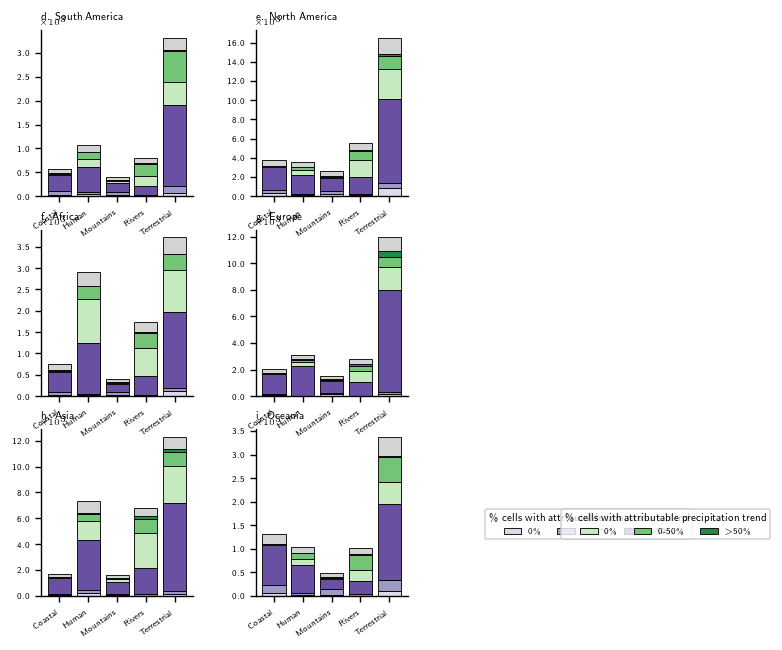

In [74]:

class OOMFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        mpl.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        #if self._useMathText:
            #self.format = r'$\mathdefault{%s}$' % self.format

def plot_continent_docs(continent, doc_continents, df_studies, sector_cols, ax, angle=35):
    colors = ["Purples","Greens"]
    group = doc_continents[doc_continents["continent"]==continent]
    print(continent)    
    ax.set_facecolor("none")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    vdf = df_studies[df_studies["id"].isin(group["doc_id"])]
    lw=0.5
    
    
    
    for i, col in enumerate(sector_cols):

        b = 0
        all_handles = []
        for j, da_var in enumerate([("temp_da_prop","6 - Temperature - mean_prediction"),("precip_da_prop","6 - Precipitation - mean_prediction")]):

            cm = mpl.cm.get_cmap(colors[j])

            cdf = vdf[(vdf[col]>=0.5) ]
            cdf = cdf[cdf[da_var[1]]>=0.5]

            y = cdf[cdf[da_var[0]]==0].shape[0]
            l1 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw,color=cm(0.25))   
            b+=y

            y = cdf[(cdf[da_var[0]]>0) & (cdf[da_var[0]]<0.5)].shape[0]
            l2 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.5))    
            b+=y

            y = cdf[(cdf[da_var[0]]>0.5)].shape[0]
            l3 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.75))  
            b+=y
            
            var_handles = [l1,l2,l3]
            all_handles.append(var_handles)
            
        cdf = vdf[(vdf[col]>=0.5) ]
        cdf = cdf[cdf[["6 - Temperature - mean_prediction","6 - Precipitation - mean_prediction"]].max(axis=1)<0.5]
        y = cdf.shape[0]
            
        l4 = ax.bar(i,y, bottom=b, edgecolor="black",lw=lw, color="lightgrey")
            
    ticks, ticklabels = zip(*[(i, x.split(' - ')[1].split()[0].replace(',','')) for i, x in enumerate(sector_cols)])
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticklabels, rotation=angle, ha="right")
    ax.tick_params(axis='both', which='major', labelsize=5)

    ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
    ax.yaxis.set_major_formatter(OOMFormatter(3, "%1.1f"))
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_size(5)
            
    return all_handles

sector_cols = [x for x in df_studies.columns if "12 - " in x and "mean" in x]

continents = [
    "South America", 
    "North America", 
    "Africa", 
    "Europe", 
    "Asia",
    "Oceania"
]

#########################################################
## Studies

fig = plt.figure(figsize=(6,6), dpi=125)
gs = fig.add_gridspec(3, 3, figure=fig, wspace=0.41)

colors = ["Blues","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]
lw = 0.5

for ci, continent in enumerate(continents):

    xi = ci % 2
    yi = ci // 2
    a = plt.subplot(gs[yi, xi])
    a.set_title(f"{chr(97+3+ci)}. {continent}",fontsize=6, fontweight="bold", loc="left")
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a)            


    
###############
## Bar legend

ax = plt.subplot(gs[:,2])
attrib_labels = [
    "0\%",
    "0-50\%",
    r"\textgreater50\%"
]

l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(.1,0.1),
    fontsize=5,
    ncol=3
)    
l0.set_title("\% cells with attributable temperature trend", prop={'size':6})
l1 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(0.6,0.1),
    fontsize=5,
    ncol=3
)    
l1.set_title("\% cells with attributable precipitation trend", prop={'size':6})

plt.gca().add_artist(l0)
ax.axis("off")

In [123]:
table = pd.DataFrame()
for i, continent in enumerate(continents):
    for j, sector in enumerate(sector_cols):
        group = doc_continents[doc_continents["continent"]==continent] 

In [131]:
list(itertools.product(*[continents,["D&A","Other"]]))

[('South America', 'D&A'),
 ('South America', 'Other'),
 ('North America', 'D&A'),
 ('North America', 'Other'),
 ('Africa', 'D&A'),
 ('Africa', 'Other'),
 ('Europe', 'D&A'),
 ('Europe', 'Other'),
 ('Asia', 'D&A'),
 ('Asia', 'Other'),
 ('Oceania', 'D&A'),
 ('Oceania', 'Other')]

In [135]:
index = pd.MultiIndex.from_tuples(list(itertools.product(*[continents,["D&A","Other"]])))
table = pd.DataFrame(index=index,columns=sector_cols)
table

12 - Coastal and marine Ecosystems - mean_prediction  \
South America D&A                                                  NaN     
              Other                                                NaN     
North America D&A                                                  NaN     
              Other                                                NaN     
Africa        D&A                                                  NaN     
              Other                                                NaN     
Europe        D&A                                                  NaN     
              Other                                                NaN     
Asia          D&A                                                  NaN     
              Other                                                NaN     
Oceania       D&A                                                  NaN     
              Other                                                NaN     

                    12 - Human and managed - mean_prediction  \
South America D&A                                        NaN   
              Other                                      NaN   
North America D&A                                        NaN   
              Other                                      NaN   
Africa        D&A                                        NaN   
              Other                                      NaN   
Europe        D&A                                        NaN   
              Other                                      NaN   
Asia          D&A                                        NaN   
              Other                                      NaN   
Oceania       D&A                                        NaN   
              Other                                      NaN   

                    12 - Mountains, snow and ice - mean_prediction  \
South America D&A                                              NaN   
              Other                                            NaN   
North America D&A                                              NaN   
              Other                                            NaN   
Africa        D&A                                              NaN   
              Other                                            NaN   
Europe        D&A                                              NaN   
              Other                                            NaN   
Asia          D&A                                              NaN   
              Other                                            NaN   
Oceania       D&A                                              NaN   
              Other                                            NaN   

                    12 - Rivers, lakes, and soil moisture - mean_prediction  \
South America D&A                                                  NaN        
              Other                                                NaN        
North America D&A                                                  NaN        
              Other                                                NaN        
Africa        D&A                                                  NaN        
              Other                                                NaN        
Europe        D&A                                                  NaN        
              Other                                                NaN        
Asia          D&A                                                  NaN        
              Other                                                NaN        
Oceania       D&A                                                  NaN        
              Other                                                NaN        

                    12 - Terrestrial ES - mean_prediction  
South America D&A                                     NaN  
              Other                                   NaN  
North America D&A                                     NaN  
              Other

In [146]:

table = pd.DataFrame(index=index,columns=sector_cols)

for i, continent in enumerate(continents):
    cdf = shp_ndf_df[shp_ndf_df['CONTINENT']==continent]
    ndf = df[df['index'].isin(cdf['ndf_id'])]
    for j, da in enumerate(["D&A","Other"]):
        for k, sector in enumerate(sector_cols):
            pass
            table.loc[(continent,da),sector] = 0
            
table

12 - Coastal and marine Ecosystems - mean_prediction  \
South America D&A                                                    0     
              Other                                                  0     
North America D&A                                                    0     
              Other                                                  0     
Africa        D&A                                                    0     
              Other                                                  0     
Europe        D&A                                                    0     
              Other                                                  0     
Asia          D&A                                                    0     
              Other                                                  0     
Oceania       D&A                                                    0     
              Other                                                  0     

                    12 - Human and managed - mean_prediction  \
South America D&A                                          0   
              Other                                        0   
North America D&A                                          0   
              Other                                        0   
Africa        D&A                                          0   
              Other                                        0   
Europe        D&A                                          0   
              Other                                        0   
Asia          D&A                                          0   
              Other                                        0   
Oceania       D&A                                          0   
              Other                                        0   

                    12 - Mountains, snow and ice - mean_prediction  \
South America D&A                                                0   
              Other                                              0   
North America D&A                                                0   
              Other                                              0   
Africa        D&A                                                0   
              Other                                              0   
Europe        D&A                                                0   
              Other                                              0   
Asia          D&A                                                0   
              Other                                              0   
Oceania       D&A                                                0   
              Other                                              0   

                    12 - Rivers, lakes, and soil moisture - mean_prediction  \
South America D&A                                                    0        
              Other                                                  0        
North America D&A                                                    0        
              Other                                                  0        
Africa        D&A                                                    0        
              Other                                                  0        
Europe        D&A                                                    0        
              Other                                                  0        
Asia          D&A                                                    0        
              Other                                                  0        
Oceania       D&A                                                    0        
              Other                                                  0        

                    12 - Terrestrial ES - mean_prediction  
South America D&A                                       0  
              Other                                     0  
North America D&A                                       0  
              Other

In [358]:



driver_preds = pd.read_csv('../data/1_driver_predictions.csv')
relevance_preds = pd.read_csv('../data/1_document_relevance.csv')
impact_drivers = impact_preds.merge(driver_preds).merge(relevance_preds)



In [425]:
table = pd.DataFrame(index=index,columns=[x.split(' - ')[1].replace('managed','managed systems').replace('ES','ecosystems') for x in sector_cols])

da_studies = df_studies[df_studies[['precip_da_prop','temp_da_prop']].max(axis=1)>0]

def ci(df, var_list):
    lower_df = df
    mid_df = df
    upper_df = df
    for var in var_list:
        mid_df = mid_df[mid_df[var]>=0.5]
        upper_df = upper_df[upper_df[var.replace("mean_prediction","upper_pred")]>=0.5]
        lower_df = lower_df[lower_df[var.replace("mean_prediction","lower_pred")]>=0.5]
        
    return f"{mid_df.shape[0]} ({lower_df.shape[0]}-{upper_df.shape[0]})"

for i, continent in enumerate(continents):
    group = doc_continents[doc_continents["continent"]==continent] 
    cdf = impact_drivers[impact_drivers['id'].isin(group.doc_id)]
    dadfs = [cdf[cdf['id'].isin(da_studies.id)],cdf[~cdf['id'].isin(da_studies.id)]]
    for j, da in enumerate(["D&A","Other"]):
        cdf = dadfs[j]
        for k, sector in enumerate(sector_cols):
            table.loc[(continent,da),sector.split(' - ')[1].replace('managed','managed systems').replace('ES','ecosystems')] = ci(cdf,['0 - relevance - mean_prediction',sector])
            
table.to_html('../supplementary_data/continent_sector_n_studies.html')
table.to_excel('../supplementary_data/continent_sector_n_studies.xlsx')
table

Coastal and marine Ecosystems Human and managed systems  \
South America D&A                   365 (194-662)             460 (275-925)   
              Other                  209 (74-520)              130 (61-322)   
North America D&A                2429 (1304-4241)           1708 (936-3300)   
              Other               1620 (579-3859)            446 (180-1240)   
Africa        D&A                   448 (219-881)           1102 (625-2039)   
              Other                 345 (105-865)             364 (164-956)   
Europe        D&A                 1300 (628-2426)           1637 (934-3162)   
              Other                678 (222-1900)              162 (70-620)   
Asia          D&A                 1164 (604-2097)          3516 (2124-6329)   
              Other                712 (256-1856)            917 (410-2383)   
Oceania       D&A                  890 (499-1484)             494 (271-979)   
              Other                594 (235-1239)              117 (50-367)   

                    Mountains, snow and ice Rivers, lakes, and soil moisture  \
South America D&A             296 (184-491)                    384 (207-794)   
              Other             57 (35-116)                    234 (141-469)   
North America D&A           1734 (972-3203)                 2621 (1415-4899)   
              Other          608 (295-1259)                  1715 (876-3595)   
Africa        D&A             268 (143-514)                   747 (393-1422)   
              Other             79 (44-199)                   531 (259-1077)   
Europe        D&A            985 (547-1937)                  1307 (743-2638)   
              Other           344 (198-723)                   834 (439-1850)   
Asia          D&A           1105 (700-2011)                 2968 (1790-5292)   
              Other           275 (144-531)                 1987 (1138-3699)   
Oceania       D&A             349 (191-622)                    521 (296-993)   
              Other             79 (44-192)                    272 (125-568)   

                    Terrestrial ecosystems  
South America D&A          1366 (699-2681)  
              Other           235 (94-592)  
North America D&A        7835 (4308-13552)  
              Other       2259 (1029-4821)  
Africa        D&A          1556 (706-2951)  
              Other         447 (182-1036)  
Europe        D&A        6006 (3389-10396)  
              Other         816 (361-2020)  
Asia          D&A        5822 (3270-10040)  
              Other         991 (402-2269)  
Oceania       D&A          1539 (777-2866)  
              Other          355 (155-873)

In [368]:
df_ndf = pd.read_csv(f'../data/study_gridcell_2.5.csv')
df_ndf = df_ndf.merge(df_ndf.groupby('doc_id').count().reset_index().rename(columns={"ndf_id":"gridcells"}))
df_ndf['weight'] = 1/df_ndf['gridcells']
df_ndf.head()

,ndf_id,doc_id,gridcells,weight
0,7674.0,3323227.0,6,0.166667
1,6804.0,3323227.0,6,0.166667
2,6720.0,3323227.0,6,0.166667
3,7327.0,3323227.0,6,0.166667
4,7674.0,3323227.0,6,0.166667


In [399]:
def ci_df(df, var_list):
    lower_df = df
    mid_df = df
    upper_df = df
    for var in var_list:
        mid_df = mid_df[mid_df[var]>=0.5]
        upper_df = upper_df[upper_df[var.replace("mean_prediction","upper_pred")]>=0.5]
        lower_df = lower_df[lower_df[var.replace("mean_prediction","lower_pred")]>=0.5]
        
    return [mid_df.id, lower_df.id, upper_df.id]

def ci_area_sum(ndf):
    results = []
    for suffix in ["","_lower","_upper"]:
        results.append(ndf[f"total_study_prop{suffix}"].mean())
        
    return f"{results[0]} ({results[1]}-{results[2]})"


table = pd.DataFrame(index=index,columns=sector_cols)

for i, continent in enumerate(continents):
    group = doc_continents[doc_continents["continent"]==continent] 
    cdf = impact_drivers[impact_drivers['id'].isin(group.doc_id)]
    for k, sector in enumerate(sector_cols):
        mid_ids, lower_ids, upper_ids = ci_df(cdf,['0 - relevance - mean_prediction',sector])
        id_subsets = [mid_ids, upper_ids, lower_ids]
        ndf = df[['index','study_addition','is_land','n_da_impacts']]
        for var, driver in [("temp","Temperature"),("precip","Precipitation")]:
            for l, (label, suffix) in enumerate([(f"{var}_study_prop","mean_prediction"),(f"{var}_study_prop_upper","upper_pred"),(f"{var}_study_prop_lower","lower_pred")]):
                var_studies = driver_df[(driver_df[f'6 - {driver} - {suffix}']>=0.5) & (driver_df['id'].isin(id_subsets[l]))].id
                var_ndf = df_ndf[df_ndf['doc_id'].isin(var_studies)].groupby('ndf_id')['weight'].sum().to_frame().rename(columns={"weight":label})
                ndf = ndf.merge(var_ndf, left_on="index", right_on="ndf_id", how="left")
                ndf[label] = ndf[label].fillna(0) 
                
        for suffix in ["","_lower","_upper"]:
                
            ndf.loc[ndf['study_addition']=="temp",f"total_study_prop{suffix}"] = ndf.loc[ndf['study_addition']=="temp",f"temp_study_prop{suffix}"]
            ndf.loc[ndf['study_addition']=="precip",f"total_study_prop{suffix}"] = ndf.loc[ndf['study_addition']=="precip",f"precip_study_prop{suffix}"]
            ndf.loc[ndf['study_addition']=="add",f"total_study_prop{suffix}"] = ndf.loc[ndf['study_addition']=="add",[f"precip_study_prop{suffix}",f"temp_study_prop{suffix}"]].sum(axis=1)
        
        for j, da in enumerate(["D&A","Other"]):
            if da=="D&A":
                sub_ndf = ndf[(abs(ndf['n_da_impacts'])>0)]
            else:
                sub_ndf = ndf[(abs(ndf['n_da_impacts'])==0)]
            table.loc[(continent,da),sector] = ci_area_sum(sub_ndf)            
table

12 - Coastal and marine Ecosystems - mean_prediction  \
South America D&A    0.04531018281124573 (0.01904830925492261-0.095...     
              Other  0.018117476118745597 (0.007737708727053602-0.0...     
North America D&A    0.3548006811935007 (0.1577222768879823-0.69959...     
              Other  0.10802869430008093 (0.044935295555393176-0.23...     
Africa        D&A    0.06616822401901899 (0.02796826348862944-0.147...     
              Other  0.01595310592617952 (0.0053593957279188635-0.0...     
Europe        D&A    0.20969341620097792 (0.09007634174637855-0.438...     
              Other  0.025077261246903626 (0.009839990618575977-0.0...     
Asia          D&A    0.17329271542873068 (0.07337118140045744-0.356...     
              Other  0.03926193529341955 (0.01668007761415306-0.084...     
Oceania       D&A    0.11756928239721154 (0.053932529869175516-0.22...     
              Other  0.03848634134235962 (0.016061672483266135-0.07...     

                              12 - Human and managed - mean_prediction  \
South America D&A    0.06320036662418362 (0.03476786832891939-0.146...   
              Other  0.027762821826405014 (0.012889689815246371-0.0...   
North America D&A    0.27202262224297985 (0.14093418604093252-0.592...   
              Other  0.06681794564327015 (0.031931015883436595-0.16...   
Africa        D&A    0.1631221642365404 (0.07813869591948785-0.3767...   
              Other  0.026115404234169637 (0.012777339512145564-0.0...   
Europe        D&A    0.30296337162322284 (0.16663555617030695-0.642...   
              Other  0.011401337888506415 (0.005387498280292732-0.0...   
Asia          D&A    0.5949727884405039 (0.3481381646395585-1.19102...   
              Other  0.10770145303640527 (0.055732455647205977-0.22...   
Oceania       D&A    0.07041241209780051 (0.03719729801478697-0.158...   
              Other  0.01677597333976299 (0.008785827927849417-0.04...   

                        12 - Mountains, snow and ice - mean_prediction  \
South America D&A    0.03443275999624258 (0.016477088208497016-0.06...   
              Other  0.01758273869326577 (0.008689141295336489-0.03...   
North America D&A    0.2257772040912214 (0.09097219696389555-0.5111...   
              Other  0.0971300660312872 (0.039373208094947716-0.220...   
Africa        D&A    0.034618789351131156 (0.0141439737228217-0.078...   
              Other  0.018223848616228798 (0.006980693349606226-0.0...   
Europe        D&A    0.14201731836743717 (0.0580291747580591-0.3445...   
              Other  0.03633736366215341 (0.014096771390978978-0.07...   
Asia          D&A    0.1724881651643702 (0.07900625179173744-0.3794...   
              Other  0.03981908452861336 (0.0159183556770474-0.0870...   
Oceania       D&A    0.040630419325515164 (0.017393404003377508-0.0...   
              Other  0.021580550390104737 (0.0114149075332415-0.050...   

                    12 - Rivers, lakes, and soil moisture - mean_prediction  \
South America D&A    0.03462876711773798 (0.013901894291305715-0.10...        
              Other  0.02465960399892157 (0.009542717183783451-0.06...        
North America D&A    0.33439903932552223 (0.122098253628485-0.81264...        
              Other  0.11983097335069105 (0.04210111806135898-0.306...        
Africa        D&A    0.0836312320489687 (0.028820742799786647-0.220...        
              Other  0.029256181453856642 (0.009509435916180174-0.0...        
Europe        D&A    0.19308821735188011 (0.07796123510357367-0.514...        
              Other  0.01685894673252044 (0.006305614847317986-0.04...        
Asia          D&A    0.4096601456139268 (0.1814900663589594-0.94982...        
              Other  0.07315561338250944 (0.03128609202333377-0.174...        
Oceania       D&A    0.054034096123363455 (0.022483013948643705-0.1...        
              Other  0.021685426204779337 (0.008441323221317285-0.0...        

                                 12 - Terrestrial ES - mean_prediction  
Sout

In [426]:
colindex = pd.MultiIndex.from_tuples(list(itertools.product(*[[x.split(' - ')[1].replace('managed','managed systems').replace('ES','ecosystems') for x in sector_cols],["area","population"]])))
table = pd.DataFrame(index=index,columns=colindex)

def ci_area_sum(ndf, sub_ndf, threshold, var):
    results = []
    ndf_sum = ndf[var].sum()
    for suffix in ["","_lower","_upper"]:
        results.append(sub_ndf[sub_ndf[f"total_study_prop{suffix}"]>=threshold][var].sum()/ndf_sum)
        
    return f"{results[0]:.0%} ({results[1]:.0%}-{results[2]:.0%})"

for i, continent in enumerate(continents):
    
    ndf_ids = shp_ndf_df[shp_ndf_df['CONTINENT']==continent].ndf_id
    group = doc_continents[doc_continents["continent"]==continent] 
    cdf = impact_drivers[impact_drivers['id'].isin(group.doc_id)]
    for k, sector in enumerate(sector_cols):
        mid_ids, lower_ids, upper_ids = ci_df(cdf,['0 - relevance - mean_prediction',sector])
        id_subsets = [mid_ids, upper_ids, lower_ids]
        ndf = df[df['index'].isin(ndf_ids)][['index','study_addition','is_land','n_da_impacts','area','population']]
        for var, driver in [("temp","Temperature"),("precip","Precipitation")]:
            for l, (label, suffix) in enumerate([(f"{var}_study_prop","mean_prediction"),(f"{var}_study_prop_upper","upper_pred"),(f"{var}_study_prop_lower","lower_pred")]):
                var_studies = driver_df[(driver_df[f'6 - {driver} - {suffix}']>=0.5) & (driver_df['id'].isin(id_subsets[l]))].id
                var_ndf = df_ndf[df_ndf['doc_id'].isin(var_studies)].groupby('ndf_id')['weight'].sum().to_frame().rename(columns={"weight":label})
                ndf = ndf.merge(var_ndf, left_on="index", right_on="ndf_id", how="left")
                ndf[label] = ndf[label].fillna(0) 
                
        for suffix in ["","_lower","_upper"]:
                
            ndf.loc[ndf['study_addition']=="temp",f"total_study_prop{suffix}"] = ndf.loc[ndf['study_addition']=="temp",f"temp_study_prop{suffix}"]
            ndf.loc[ndf['study_addition']=="precip",f"total_study_prop{suffix}"] = ndf.loc[ndf['study_addition']=="precip",f"precip_study_prop{suffix}"]
            ndf.loc[ndf['study_addition']=="add",f"total_study_prop{suffix}"] = ndf.loc[ndf['study_addition']=="add",[f"precip_study_prop{suffix}",f"temp_study_prop{suffix}"]].sum(axis=1)
        
        for j, da in enumerate(["D&A","Other"]):
            if da=="D&A":
                sub_ndf = ndf[(abs(ndf['n_da_impacts'])>0)]
            else:
                sub_ndf = ndf[(abs(ndf['n_da_impacts'])==0)]
                
            for var in ["area","population"]:
                table.loc[(continent,da),(sector.split(' - ')[1].replace('managed','managed systems').replace('ES','ecosystems'), var)] = ci_area_sum(ndf, sub_ndf,1, var)       

table

In [428]:
table.to_html('../supplementary_data/area_pop_sums.html')
table.to_excel('../supplementary_data/area_pop_sums.xlsx')
table

Coastal and marine Ecosystems                 \
                                             area     population   
South America D&A                     8% (5%-30%)  26% (18%-51%)   
              Other                   4% (2%-27%)    6% (2%-15%)   
North America D&A                   34% (22%-49%)  58% (43%-70%)   
              Other                  11% (5%-11%)   27% (9%-27%)   
Africa        D&A                    13% (5%-25%)  22% (12%-37%)   
              Other                    2% (0%-4%)     1% (0%-4%)   
Europe        D&A                   18% (13%-24%)  59% (41%-71%)   
              Other                    0% (0%-0%)     0% (0%-0%)   
Asia          D&A                    23% (9%-32%)  47% (18%-58%)   
              Other                    4% (1%-5%)    9% (4%-13%)   
Oceania       D&A                   71% (63%-72%)  91% (59%-91%)   
              Other                 14% (13%-14%)     5% (5%-5%)   

                    Human and managed systems                 \
                                         area     population   
South America D&A               27% (13%-61%)  55% (38%-79%)   
              Other              24% (6%-34%)   14% (9%-17%)   
North America D&A               37% (23%-56%)  64% (48%-72%)   
              Other               8% (7%-15%)  28% (26%-28%)   
Africa        D&A               32% (25%-47%)  68% (58%-79%)   
              Other               7% (3%-13%)     3% (3%-5%)   
Europe        D&A               26% (22%-34%)  80% (73%-88%)   
              Other                1% (0%-1%)     0% (0%-0%)   
Asia          D&A               62% (46%-77%)  80% (75%-82%)   
              Other                6% (6%-9%)  15% (15%-15%)   
Oceania       D&A               66% (47%-77%)  70% (54%-86%)   
              Other             13% (13%-13%)     5% (5%-5%)   

                    Mountains, snow and ice                 \
                                       area     population   
South America D&A              11% (9%-16%)  19% (14%-32%)   
              Other            13% (5%-14%)    6% (3%-10%)   
North America D&A             31% (17%-51%)  43% (27%-56%)   
              Other             7% (4%-19%)   19% (8%-24%)   
Africa        D&A                3% (1%-9%)    7% (6%-14%)   
              Other              0% (0%-1%)     0% (0%-1%)   
Europe        D&A              22% (9%-31%)  58% (25%-79%)   
              Other              0% (0%-1%)     0% (0%-0%)   
Asia          D&A             26% (14%-41%)  39% (12%-56%)   
              Other              4% (2%-5%)   14% (6%-14%)   
Oceania       D&A                5% (2%-9%)  37% (15%-53%)   
              Other              3% (3%-4%)     4% (4%-4%)   

                    Rivers, lakes, and soil moisture                 \
                                                area     population   
South America D&A                       17% (7%-44%)  33% (14%-68%)   
              Other                     18% (3%-33%)   15% (5%-19%)   
North America D&A                      47% (22%-61%)  60% (41%-69%)   
              Other                     14% (8%-17%)  28% (28%-28%)   
Africa        D&A                       18% (5%-36%)  44% (18%-68%)   
              Other                      9% (1%-13%)     4% (2%-7%)   
Europe        D&A                      26% (19%-33%)  77% (64%-86%)   
              Other                       1% (1%-1%)     0% (0%-0%)   
Asia          D&A                      59% (32%-71%)  75% (50%-81%)   
              Other                       6% (5%-7%)  15% (15%-15%)   
Oceania       D&A                       18% (4%-71%)  53% (43%-82%)   
              Other                     13% (3%-13%)     5% (4%-5%)   

                    Terrestrial ecosystems                 
                                      area     population  
South America D&A            64% (38%-64%)  77% (67%-81%)  
              Other          35% (29%-35%)  19% (17%-19%)  
North America D&A            69% (59%-70%)  70% (64%-72%)  
      